## Visualisation tools

In [176]:
from map_dm_nav.visualisation_tools import plot_likelihood
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns
from matplotlib import colors
from map_dm_nav.model.modules import from_degree_to_point


In [177]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def plot_transitions(B: np.ndarray, state_map: dict, actions: dict) -> np.ndarray:
    """Plot Transitions matrix showing the probability of a transition between two states given a certain action."""
    
    sorted_state_map = dict(sorted(state_map.items(), key=lambda item: item[1]['state']))
    labels = [f"{key} ({value['state']})" for key, value in sorted_state_map.items()]

    n_actions = len(actions)
    l = int(np.ceil(np.sqrt(n_actions)))
    L = int(np.ceil(n_actions / l))
    
    fig, axes = plt.subplots(L, l, figsize=(L*3 + max(10, 2.5*len(state_map)), 
                                             l*2 + max(10, 1.5*len(state_map))))
    
    axes = np.atleast_2d(axes)  # Ensure axes is always a 2D array
    count = 0

    for i in range(L):
        for j in range(l):
            if count >= n_actions:
                fig.delaxes(axes[i][j])
                continue
            
            if count not in actions:
                continue

            action_str = str(actions[count])  # Convert action name to string

            # Plot the heatmap
            g = sns.heatmap(B[:len(labels), :len(labels), count], cmap="OrRd", linewidth=3, 
                            cbar=False, ax=axes[i, j], xticklabels=labels, yticklabels=labels)

            g.tick_params(axis='both', which='major', labelsize=14)  # Adjust label font size
            g.set_title(action_str, fontsize=20)
            g.set_xlabel('Prev State', fontsize=16)
            g.set_ylabel('Next State', fontsize=16)

            # Rotate labels for better visibility
            g.set_xticklabels(labels, rotation=45, ha="right", fontsize=12)
            g.set_yticklabels(labels, rotation=0, fontsize=12)
            
            count += 1

    plt.subplots_adjust(left=0.2, bottom=0.2)  # Add margin space
    plt.tight_layout()

    return fig


In [178]:
def plot_state_in_map(B: np.ndarray, state_mapping: dict,fig_ax=[None, None]) -> np.ndarray:
    """
    Plot states as dots positioned based on `state_mapping` keys.
    Draw transitions between states based on transition probabilities in `B`.

    Parameters:
    - B (np.ndarray): Transition matrix of shape (num_states, num_states, num_actions).
    - state_mapping (dict): Mapping of (x, y) positions to state properties.
    - possible_actions (dict): Dictionary of action indices to angle ranges.
    - pose_dist (float): Distance associated with each move action.

    Returns:
    - fig (matplotlib Figure): The generated figure.
    """
    if fig_ax[0] is None:
        fig, ax = plt.subplots(figsize=(25, 25))
    else:
        fig = fig_ax[0]
        ax = fig_ax[1]


    # Get unique observation values for color mapping
    unique_obs = np.sort(list({v['ob'] for v in state_mapping.values()}))
    color_map = get_cmap() #get_cmap('viridis', len(unique_obs))
    ob_to_color = {ob: color_map.colors[i] for i, ob in enumerate(unique_obs)}

    # Draw transitions between states
    num_states, _, num_actions = B.shape
    for prev_state in range(num_states):
        for next_state in range(num_states):
            for action in range(num_actions):
                prob = B[next_state, prev_state, action]
                if prob > 0.1:  # Only plot meaningful transitions
                    # Find corresponding positions in `state_mapping`
                    prev_pos = next((pos for pos, data in state_mapping.items() if data['state'] == prev_state), None)
                    next_pos = next((pos for pos, data in state_mapping.items() if data['state'] == next_state), None)
                    
                    if prev_pos and next_pos:
                        ax.plot([prev_pos[1], next_pos[1]], [prev_pos[0], next_pos[0]], 
                                'k-', linewidth=prob * 10)  # Scale linewidth with probability

    # Plot states as dots
    for (x, y), data in state_mapping.items():
        state = data['state']
        ob = data.get('ob', 0)
        color = ob_to_color[ob]

        ax.plot(y, x, 'o', color=color, markersize=20)  # Position state as (y, x)
        ax.text(y - 0.05, x + 0.05, str(state), fontsize=25, ha='right', c='r')  # Label state number

    # Formatting
    # ax.invert_yaxis()
    ax.invert_xaxis()
    ax.set_aspect('equal')
    ax.tick_params(axis='both', which='major', labelsize=26)
    plt.ylabel('X', fontsize=30)
    plt.xlabel('Y', fontsize=30)
    plt.title('State Transitions', fontsize=35)
    plt.grid(False)
    
    return fig
def create_custom_cmap(custom_colors) -> colors.ListedColormap:
    return colors.ListedColormap(custom_colors[:]) #,  alpha=None)

def get_cmap() -> colors.ListedColormap:
    custom_colors = (
            np.array(
                [
                    [255, 255, 255],#white 1
                    [255, 0, 0],#red 2
                    [0, 255, 0], #green 3
                    [50,50, 255], #bluish 4
                    [112, 39, 195], #purple5
                    [255, 255, 0], #yellow6
                    [100, 100, 100], #grey7
                    [115, 60, 60], #brown8
                    [255, 0, 255], #flash pink9
                    [80, 145,80], #kaki10
                    [201,132,226], #pink11
                    [75,182,220], #turquoise12
                    [255,153,51], #orange13
                    [255,204,229], #light pink14
                    [153,153,0], #ugly kaki 15
                    [229,255,204], #light green16
                    [204,204,255],#light purple17
                    [0, 153,153], #dark turquoise18
                    [138, 108, 106], #light brown19
                    [108, 115, 92],#ugly green20
                    [149, 199, 152],#pale green21
                    [89, 235, 210], #flashy light blue22
                    [37, 105, 122], #dark blue23
                    [22, 25, 92], #dark purple-blue24
                    [131, 24, 219], #flashy purple25
                    [109, 11, 120], #purple-pink26
                    [196, 145, 191], #pale pink27
                    [148, 89, 130], #dark pink28
                    [201, 75, 119], #pink-red29
                    [189, 89, 92], #light red30

                ]
            )
            / 256
        )

    n_colors = len(custom_colors)
    return create_custom_cmap(custom_colors[:n_colors])


## Model 

In [179]:
from map_dm_nav.model.pymdp.agent import Agent
from map_dm_nav.model.pymdp import utils
from map_dm_nav.model.modules import *
from map_dm_nav.model.pymdp.learning import update_obs_likelihood_dirichlet
from map_dm_nav.model.odometry import PoseOdometry

In [180]:
class Ours_V4_RW1(Agent):
    #====== NECESSARY TO SETUP MODEL ======#
    def __init__(self, num_obs=2, num_states=2, dim=2, observations=[0,(0,0)], lookahead=4, \
                 learning_rate_pB=3.0, n_actions= 6, inference_algo= 'VANILLA', \
                 influence_radius:float=0.5, robot_dim:float=0.25) -> None:
        self.agent_state_mapping = {} #testing purposes
        self.influence_radius = influence_radius
        self.robot_dim = robot_dim 
        self.possible_actions = self.generate_actions(n_actions) 
        self.PoseMemory = PoseOdometry(self.possible_actions, influence_radius, robot_dim)

        self.preferred_ob = [-1,-1]
        self.lookahead_distance = False #lookahead in number of consecutive angle_increments
        self.simple_paths = True # less computationally expensive path than full coverage paths 
                                 #(consider only a few direction and never go back on path)

        observations, agent_params = self.create_agent_params(num_obs=num_obs, num_states=num_states, observations=observations, \
                            learning_rate_pB=learning_rate_pB, dim=dim, lookahead=lookahead, inference_algo = inference_algo)
        super().__init__(**agent_params)
        self.initialisation(observations=observations)
    
    def create_agent_params(self,num_obs:int=2, num_states:int=2, observations:list=[0,(0,0)], 
                    learning_rate_pB:float=3.0, dim:int=2, lookahead:int=4,inference_algo:str='VANILLA'):
        ob = observations[0]
        p_idx = -1
        if dim > 1:
            #start pose in map
            if len(observations) < 2:
                observations.append([0.0,0.0])
            self.PoseMemory.reset_odom(observations[1])
            p_idx = self.PoseMemory.pose_to_id()
            observations[1] = p_idx
            
        else:
            p_idx = self.PoseMemory.pose_to_id()
        
        self.current_pose = self.PoseMemory.get_odom(as_tuple=True)
        #INITIALISE AGENT PARAMS
        B_agent = create_B_matrix(num_states,len(self.possible_actions))
        if 'STAY' in self.possible_actions and self.set_stationary_B:
            B_agent = set_stationary(B_agent,self.possible_actions['STAY'])
        pB = utils.to_obj_array(B_agent)

        obs_dim = [np.max([num_obs, ob + 1])] + ([np.max([num_obs, p_idx + 1])] if dim > 1 else [])
        A_agent = create_A_matrix(obs_dim,[num_states]*dim,dim)
        pA = utils.dirichlet_like(A_agent, scale = 1)

        return observations, {
            'A': A_agent,
            'B': B_agent,
            'pA': pA,
            'pB': pB,
            'policy_len': lookahead,
            'inference_horizon': lookahead,
            'lr_pB': learning_rate_pB,
            'lr_pA': 3,
            'inference_algo': inference_algo,
            'save_belief_hist': True,
            'action_selection': "stochastic", 
            'use_param_info_gain': False
        }

    def initialisation(self,observations:list=[0,[0,0]], linear_policies:bool=True, E=None):
        """
        Initialises the agent with the first observation and ensures all parameters 
        are suitable for continuous navigation.

        Parameters:
            observations (list, optional): Initial observation. Defaults to [0, [0, 0]].
            linear_policies (bool, optional): 
                - If **False**: Explores all combinations of actions (exponential complexity: `n_action^policy_len` with `policy_len == lookahead`).
                - If **True**: Generates a linear path reaching a **lookahead distance** or **num steps**.
                - The path remains linear if no "STAY" actions are included.
                - If "STAY" actions exist, the path follows a polynomial pattern.
                - "STAY" actions are irregular and appear only at the end of a policy.
            E (optional): Additional environment-specific parameters (default: None).

        Note:
            - `linear_policies=True` is optimized for cases where `num_factor == 1` 
            and `len(num_control) == 1`.

        Returns:
            None
        """
      
        # if linear_policies:
            # self.init_policies(E)
        self.reset(start_pose=self.PoseMemory.get_poses_from_memory()[0])
        if self.edge_handling_params["use_BMA"] and hasattr(self, "q_pi_hist"): #This is not compatible with our way of moving
            del self.q_pi_hist
            
        self.inference_params_dict = {'MMP':
                    {'num_iter': 6, 'grad_descent': True, 'tau': 0.25},
                    'VANILLA':
                    {'num_iter': 3, 'dF': 1.0, 'dF_tol': 0.001}}
        self.switch_inference_algo(algo_type=self.inference_algo)
        
        #Not necessary angle_increment, but cleaner
        for i in range(len(self.A)):
            self.A[i][:,:] = 0.01 #reset A for cleaner plot and more fair state inference
        self.update_A_with_data(observations,0)
        self.update_agent_state_mapping(self.current_pose, observations, 0)
        self.infer_states(observation = observations, distr_obs=False, partial_ob=None)
        return 
    
    def switch_inference_algo(self, algo_type:str=None):
        """ inference_params are slightly different from base Agent"""
        if isinstance(algo_type, str):
            self.inference_algo = algo_type

        elif self.inference_algo == "VANILLA":
            self.inference_algo = "MMP" 
        
        else:
            self.inference_algo = "VANILLA" 
        self.inference_params = self.inference_params_dict[self.inference_algo]
    
    def generate_actions(self,n_actions:int)->dict:
        """
        Divides the 360-degree orientation into discrete action zones and 
        returns a dictionary mapping each action to its corresponding range.

        Parameters:
            n_actions (int): The number of discrete actions to divide the 
                            360-degree space into.

        Returns:
            dict: A dictionary where keys are action indices (int), and values 
                are lists containing the start and end zone (in degrees):
                `{action_index: [start_zone, end_zone]}`.

        Note:
            - The action zones are evenly spaced across 360 degrees.
            - The function include a "STAY" action.
            - The start and end values are rounded to the nearest integer.
        """
        stay = False
        if n_actions% 2 != 0:
            n_actions = n_actions-1
            stay = True
        zone_range_deg = round(360/n_actions,1)
        n_actions_keys = np.arange(0, n_actions, 1)
        zone_spacing_deg = np.arange(0, 361, zone_range_deg)
        possible_actions = {}
        for action_key in n_actions_keys:
            possible_actions[action_key] = [round(zone_spacing_deg[action_key]), round(zone_spacing_deg[action_key+1]),]
        if stay:
            possible_actions[len(possible_actions)] = "STAY"

        return possible_actions

    def update_agent_state_mapping(self, pose:tuple, ob:list, state_belief:list=None)-> dict:
        """ Dictionnary to keep track of believes and associated obs, usefull for testing purposes"""
        if state_belief is None:
            state = -1
        else:
            state = np.argmax(state_belief)
        #If we already have an ob, let's not squish it with ghost nodes updates
        if pose in self.agent_state_mapping.keys() and self.agent_state_mapping[pose]['ob'] != -1:
            ob[0] = self.agent_state_mapping[pose]['ob']
        self.agent_state_mapping[pose] = {'state' : state , 'ob': ob[0]}
        if len(ob) > 1:
           self.agent_state_mapping[pose]['ob2'] =  ob[1] 
      
        return self.agent_state_mapping
    
    def get_belief_over_states(self, Qs=None, n_step_past=0, verbose=False):
        """
        Computes the mean belief distribution over states from multiple policy-based beliefs.

        If `Qs` is structured as `Qs[policy][timestep]`, this function extracts 
        the mean belief distribution over policies at a given timestep. It selects 
        the most recent belief (`current_qs`) by default, unless a past timestep 
        (`n_step_past`) is specified.

        Parameters:
            Qs (list, optional): A list of belief distributions over states, 
                                structured as `Qs[policy][timestep]`. 
                                Defaults to `self.qs`.
            n_step_past (int, optional): The number of steps back to retrieve 
                                        the belief. Only valid when the number 
                                        of steps is less than `self.inference_horizon`. 
                                        Otherwise, always returns `qs_step`. 
                                        Defaults to 0.
            verbose (bool, optional): If `True`, prints debug information. Defaults to `False`.

        Returns:
            np.ndarray: The extracted belief distribution over states.

        Notes:
            - If `Qs` contains only one belief distribution, it is returned as is.
            - If multiple policies exist, the function ensures all policies have 
            consistent lengths (truncating if necessary).
            - If the number of previous observations exceeds `self.inference_horizon`, 
            `qs_step` is used instead of looking at past steps.
        """
        if Qs is None:
            Qs = self.qs
            
        if len(Qs) == 1:
            my_qs = Qs
            
        else:
            
            qs_copy = [q[:self.policy_len + 1] for q in Qs] #In case we have policies of various length.
            current_qs_idx = self.qs_step if len(self.prev_obs) > self.inference_horizon \
                                        else np.max([self.qs_step - n_step_past,0])
            qs_mean = np.mean(qs_copy, axis=0)
            my_qs = qs_mean[current_qs_idx]

            if verbose:
                print('get_belief_over_states', current_qs_idx, qs_mean)
                print('get_belief_over_states QS:', my_qs)
                    
        return my_qs
    
    def reset(self, init_qs:np.ndarray=None, start_pose:tuple=None):
        """
        Resets the agent's posterior beliefs about hidden states to a uniform distribution 
        and resets the simulation time to the initial timestep.

        This function initializes or resets key agent parameters, including past actions, 
        observations, and beliefs, ensuring proper inference and navigation behavior.

        Parameters
        ----------
        init_qs : numpy.ndarray, optional
            A predefined posterior over hidden states. If provided, the agent's beliefs 
            will be initialized using `init_qs` instead of a uniform prior.
        
        start_pose : tuple, optional
            The initial position (pose) of the agent. If provided, it sets `self.current_pose`.

        Returns
        -------
        qs : numpy.ndarray
            The initialized posterior over hidden states. The structure of `qs` depends on 
            the inference algorithm selected:

            - If `self.inference_algo == 'VANILLA'`:  
            `qs` is a simple uniform distribution over hidden states.

            - If `self.inference_algo == 'MMP'` (i.e., when `self.inference_horizon > 1`):  
            `qs` is a structured array accounting for policy- and timestep-conditioned beliefs.  
            In this case:
            
            - `qs[p_idx][t_idx][f_idx]` represents the marginal belief over factor `f_idx` 
                under policy `p_idx` at timestep `t_idx`.
            - Only beliefs at `t_idx = 0` are initialized; future time steps remain empty.

        Notes
        -----
        - If `self.edge_handling_params['policy_sep_prior']` is enabled, 
        the latest beliefs are initialized separately for each policy.
        - If `init_qs` is provided, it is directly assigned to `self.qs`, 
        bypassing uniform initialization.
        """

        self.curr_timestep = 0
        self.action = None
        self.prev_actions = None
        self.prev_obs = []
        self.qs_step = 0
     
        self.current_pose = start_pose
        if init_qs is None:
            
            self.D = self._construct_D_prior()
           
            if hasattr(self, "q_pi_hist"):
                self.q_pi_hist = []

            if hasattr(self, "qs_hist"):
                self.qs_hist = []
            
            if self.inference_algo == 'VANILLA':
                self.qs = utils.obj_array_uniform(self.num_states)
            else: # in the case you're doing MMP (i.e. you have an inference_horizon > 1), we have to account for policy- and timestep-conditioned posterior beliefs
                self.qs = utils.obj_array(len(self.policies))
                for p_i, _ in enumerate(self.policies):
                
                    self.qs[p_i] = utils.obj_array_uniform(\
                        [self.num_states] * (self.inference_horizon + self.policy_len + 1)) # + 1 to include belief about current timestep
                    #self.qs[p_i][0] = utils.obj_array_uniform(self.num_states)
                
                first_belief = utils.obj_array(len(self.policies))
                for p_i, _ in enumerate(self.policies):
                    first_belief[p_i] = copy.deepcopy(self.D) 
                
                if self.edge_handling_params['policy_sep_prior']:
                    self.set_latest_beliefs(last_belief = first_belief)
                else:
                    self.set_latest_beliefs(last_belief = self.D)
        
        else:
            self.qs = init_qs

        return self.qs
    
    def infer_states(self, observation:list, action:int= None ,save_hist:bool=True, 
                     distr_obs:bool = False, partial_ob:int=None, qs:list=None):
        """
        Performs variational inference to update posterior beliefs over hidden states given an observation.

        This method updates the agent's belief state (`qs`) by incorporating new observations 
        and optionally considering the previous action. The update process depends on the 
        selected inference algorithm (`VANILLA` or `MMP`).

        Parameters
        ----------
        observation : list or tuple of int
            The observed state indices for each observation modality.
            If `distr_obs` is True, this parameter represents a probability distribution over observations.

        action : int, optional
            The most recent action taken by the agent. If provided, it helps refine posterior beliefs.

        save_hist : bool, default=True
            If True, stores the latest observation and updates historical data for future inference.

        distr_obs : bool, default=False
            If True, treats `observation` as a distribution over possible observations.

        partial_ob : int, optional
            Specifies a particular observation modality to update the belief state for, rather than all modalities.

        qs : list, optional
            A predefined posterior belief state. If provided, this will be used instead of computing from scratch.

        Returns
        -------
        qs : numpy.ndarray of dtype object
            Updated posterior beliefs over hidden states. The structure depends on the inference algorithm:
            
            - For `VANILLA`, `qs` represents a single posterior belief over hidden states.
            - For `MMP`, `qs` has an indexed structure reflecting policy- and timestep-conditioned beliefs.
            Specifically, `qs[p_idx][t_idx][f_idx]` denotes the belief over factor `f_idx` 
            for policy `p_idx` at timestep `t_idx`.

        mean_qs_over_policies : numpy.ndarray
            The mean belief over states, averaged across different policies.

        Notes
        -----
        - If `self.inference_algo == "VANILLA"`, posterior updates consider an empirical prior derived from 
        the transition model (`B`) or from a uniform prior (`D`).
        - If `self.inference_algo == "MMP"`, posterior updates incorporate a structured belief over policies 
        and time using multiple time-dependent observations.
        - If the number of observations exceeds the inference horizon, only the most recent observations are retained.
        - If a modality mismatch is detected (e.g., new observation length differs from previous ones), 
        the agent resets its history to ensure consistency.
        - The method also updates `self.qs_hist` and `self.qs_step` when `save_hist=True`, 
        enabling tracking of belief evolution over time.
        """
        # print('infer state',self.inference_algo, action)
        observation = tuple(observation) if not distr_obs else observation
        if save_hist:
            self.prev_obs.append(observation)
            observations_hist = self.prev_obs
        else:
            observations_hist = self.prev_obs.copy()
            observations_hist.append(observation)

        if action != None:
            if self.prev_actions != None:
                prev_actions = self.prev_actions.copy()
            else:
                prev_actions = []
            prev_actions.append(action)
        else:
            prev_actions = self.prev_actions
            action = self.action

        if len(observations_hist) > self.inference_horizon:
            latest_obs = observations_hist[-self.inference_horizon:]
            latest_actions = prev_actions[-(self.inference_horizon-1):]
        else:
            latest_obs = observations_hist
            latest_actions = prev_actions
        
        if partial_ob is None and len(latest_obs[0]) != len(latest_obs[-1]):
            self.qs_step = 0
            self.prev_actions = None
            self.prev_obs = []
            if save_hist:
                self.prev_obs = [latest_obs[-1]]
            latest_obs = [latest_obs[-1]]
            latest_actions = self.prev_actions

        if self.inference_algo == "VANILLA":
            if action is not None:
                if qs is None:
                    qs = self.get_belief_over_states() #we don't want to consider current obs to selest qs
                empirical_prior = control.get_expected_states(
                    qs, self.B, action.reshape(1, -1) #type: ignore
                )[0]
            else:
                self.D = self._construct_D_prior() #self.D
                empirical_prior = self.D
            if self.current_pose is None:
                #TODO: increase A with observation even when self.current_pose is None
                for i in range(len(self.A)):
                    if partial_ob != None:
                        i = partial_ob
                    if observation[i] >= len(self.A[i]):
                        print('ERROR IN INFER STATE: given observation not in A')
                        qs = self.get_belief_over_states()
                        mean_qs_over_policies = qs.copy()
                        return qs, mean_qs_over_policies
            qs = update_posterior_states(
            self.A,
            observation,
            empirical_prior,
            partial_ob,
            **self.inference_params
            )
            F = 0
            mean_qs_over_policies = qs.copy()
            qs_step = 0
        elif self.inference_algo == "MMP":

            if not hasattr(self, "qs"):
                self.reset()
    
            prior = self.latest_belief

            #MMP 
            if isinstance(prior[0][0], np.ndarray):  # Check if nested array
                for i in range(len(prior)):
                    if len(prior[i][0]) < self.num_states[0]:
                        prior[i][0] = np.append(prior[i][0], [0] * (self.num_states[0] - len(prior[i][0])))
                self.latest_belief = prior
                if not self.edge_handling_params['policy_sep_prior']:
                    prior = np.mean(prior, axis=0)
      
            
            elif len(prior[0]) < self.num_states[0]:
                prior[0] = np.append(prior[0], [0] * (self.num_states[0] - len(prior[0])))
                self.latest_belief = prior
                self.D = self._construct_D_prior()
     

            # print('latest_obs',latest_obs)
            # print('latest_actions',latest_actions)
            # print('partial_ob', partial_ob)
            # print('prior', self.latest_belief)
            qs, F = update_posterior_states_full(
                self.A,
                self.B,
                latest_obs,
                self.policies, 
                latest_actions, 
                prior = prior, 
                policy_sep_prior = self.edge_handling_params['policy_sep_prior'],
                partial_ob = partial_ob,
                **self.inference_params
            )
  
            selected_qs = [q[:self.policy_len + 1] for q in qs]
            mean_qs = np.mean(selected_qs, axis=0)
            qs_step = len(latest_obs)-1
            mean_qs_over_policies = mean_qs[qs_step]
            # print('current full qs mean', mean_qs)
            # print('current_qs',mean_qs_over_policies, 'qs idx', self.qs_step, 'save hist', save_hist)
        if save_hist:
            self.F = F # variational free energy of each policy  
            self.qs_step = qs_step
            if hasattr(self, "qs_hist"):
                self.qs_hist.append(qs)
            self.qs = qs

        return qs, mean_qs_over_policies
    
    
    #==== Update A and B ====#
    def update_A_with_data(self,obs:list, state:int)->np.ndarray:
        """Given obs and state, update A entry """
        A = self.A
        
        for dim in range(self.num_modalities ):
            A[dim][:,state] = 0
            A[dim][obs[dim],state] = 1
        self.A = A
        return A
    
    def update_A(self, obs, qs=None):
        """
        Update approximate posterior beliefs about Dirichlet parameters that parameterise the observation likelihood or ``A`` array.

        Parameters
        ----------
        observation: ``list`` or ``tuple`` of ints
            The observation input. Each entry ``observation[m]`` stores the index of the discrete
            observation for modality ``m``.

        Returns
        -----------
        qA: ``numpy.ndarray`` of dtype object
            Posterior Dirichlet parameters over observation self (same shape as ``A``), after having updated it with observations.
        """
        if qs is None:
            qs = self.qs
        qA = update_obs_likelihood_dirichlet(
            self.pA, 
            self.A, 
            obs, 
            qs, 
            self.lr_pA, 
            self.modalities_to_learn
        )

        self.pA = qA # set new prior to posterior
        self.A = utils.norm_dist_obj_arr(qA) # take expected value of posterior Dirichlet parameters to calculate posterior over A array

        return qA
    
    def update_A_belief(self,obs:list)->None:
        #UPDATE A given all observations
        #IDENTIFY WHERE THE AGENT BELIEVES TO BE
        _, Qs = self.infer_states(obs, distr_obs=False) 
        self.update_A(obs, Qs)
        self.update_A(obs, Qs) #twice to increase effect (not mandatory)

    def update_B(self,qs:np.ndarray, qs_prev:np.ndarray, action:int, lr_pB:int=None)-> np.ndarray:
        """
        Updates the posterior Dirichlet parameters (`pB`) that parameterize the transition likelihood (`B`).

        This function refines the transition model by incorporating new posterior beliefs about states (`qs`),
        previous state beliefs (`qs_prev`), and the most recent action taken. The update is performed using 
        a Dirichlet-multinomial approach, ensuring a smooth adaptation of transition probabilities.

        Parameters
        ----------
        qs : numpy.ndarray
            Marginal posterior beliefs over hidden states at the current time step.

        qs_prev : numpy.ndarray
            Marginal posterior beliefs over hidden states at the previous time step.

        action : int
            The most recent action taken by the agent, which affects transition updates.

        lr_pB : int, optional
            Learning rate for updating `pB`. If not specified, defaults to `self.lr_pB`.

        Returns
        -------
        qB : numpy.ndarray
            Updated posterior Dirichlet parameters over transition probabilities (`B`). 
            This has the same shape as `B` but now incorporates learned state-action transitions.

        Notes
        -----
        - The update is computed using the `update_state_likelihood_dirichlet` function, 
        which adjusts `pB` based on the observed transitions.
        - The function ensures that `qB` does not contain negative values by applying a failsafe correction.
        - Transition probabilities (`B`) are normalized after updating `pB` to maintain a valid probability distribution.
        - If `lr_pB` is negative, a failsafe mechanism prevents `qB` from dropping below a minimum threshold (0.005).
        - The updated `qB` is stored as `self.pB`, and `B` is re-normalized for future inference.

        """
        
        if lr_pB is None:
            lr_pB = self.lr_pB

        qB = update_state_likelihood_dirichlet(
            self.pB,
            self.B,
            [action],
            qs,
            qs_prev,
            lr_pB,
            self.factors_to_learn
        )
        qB[0] = np.maximum(qB[0], 0.005) #No negative value (failsafe because of lr possibly negative)
        #no 0 values because 0 values can't variate anymore
        self.pB = qB # set new prior to posterior
        self.B = utils.norm_dist_obj_arr(qB)  # take expected value of posterior Dirichlet parameters to calculate posterior over B array
        return qB

    def update_A_dim_given_obs(self, obs:list,null_proba:list=[True]) -> np.ndarray:
        ''' 
        Verify if the observations are new and fit into the current A shape.
        If not, increase A shape in observation (n row) only.
        '''
        A = self.A
        num_obs, num_states, num_modalities, num_factors = utils.get_model_dimensions(A=A)
        
        # Calculate the maximum dimension increase needed across all modalities
        dim_add = [int(max(0,obs[m] + 1 - num_obs[m])) for m in range(num_modalities)]
        # Update matrices size
        for m in range(num_modalities):
            A[m] = update_A_matrix_size(A[m], add_ob=dim_add[m], null_proba=null_proba[m])
            if self.pA is not None:
                self.pA[m] = utils.dirichlet_like(utils.to_obj_array(A[m]), scale=1)[0]
        num_obs, num_states, num_modalities, num_factors = utils.get_model_dimensions(A=A)
        self.num_obs = num_obs
        self.A = A
        return A
    
    def update_A_dim_given_pose(self, pose_idx:int,null_proba:bool=True) -> np.ndarray:
        ''' 
        Verify if the observations are new and fit into the current A shape.
        If not, increase A shape and associate those observations with the newest state generated.
        If yes, search for the first empty column available and fill it with new inferred position (pose_idx)
        '''
        A = self.A
        num_obs, num_states, num_modalities, num_factors = utils.get_model_dimensions(A=A)
        if pose_idx >= max(num_states):
            # Calculate the maximum dimension increase needed across all modalities
            dim_add = int(max(0,pose_idx + 1 - num_obs[num_modalities-1]))
            # Update matrices size
            #and associate new observations with the newest state generated
            if dim_add > 0:
                A[0] = update_A_matrix_size(A[0], add_state=dim_add, null_proba=null_proba)
                if num_modalities > 1:
                    A[1] = update_A_matrix_size(A[1], add_ob=dim_add, add_state=dim_add, null_proba=null_proba)
                    self.num_obs[1] = A[1].shape[0]
        if num_modalities > 1:
            #columns_wthout_data = np.sort(np.append(np.where(np.all(A[1] == 1/A[1].shape[0], axis=0))[0], np.where(np.all(A[1] == 0, axis=0))[0]))
            A[1][:, pose_idx] = 0
            A[1][pose_idx, pose_idx] = 1
            

        if self.pA is not None:
            self.pA = utils.dirichlet_like(utils.to_obj_array(A), scale=1)
                        
        self.num_states = [A[0].shape[1]]
        self.A = A
        return A
    
    def update_B_dim_given_A(self)-> np.ndarray:
        """ knowing A dimension, update B state dimension to match"""
        B = self.B
        add_dim = self.A[0].shape[1]-B[0].shape[1]
        if add_dim > 0: 
            #increase B dim
            B = update_B_matrix_size(B, add= add_dim)
            self.pB = update_B_matrix_size(self.pB, add= add_dim, alter_weights=True)
            if len(self.qs) > 1:
                for seq in self.qs:
                    for subseq in seq:
                        subseq[0] = np.append(subseq[0], [0] * add_dim)
            else:
            
                self.qs[0] = np.append(self.qs[0],[0]*add_dim)
        
        self.num_states = [B[0].shape[0]]
        self.B = B
        return B
    
    def update_believes_with_obs(self, Qs:list, action:int, obs:list)-> None:
        #UPDATE B
        if len(self.qs_hist) > 0:#secutity check
            qs_hist = self.get_belief_over_states(self.qs_hist[-1])
            qs_hist[0] = np.append(qs_hist[0],[0]*\
                                   (len(Qs[0])-len(qs_hist[0])))
            self.update_B(Qs, qs_hist, action, lr_pB = 10) 
            #2 WAYS TRANSITION UPDATE (only if T to diff state)
            if np.argmax(qs_hist[0]) != np.argmax(Qs[0]):
                a_inv = reverse_action(self.possible_actions, action)
                self.update_B(qs_hist, Qs, a_inv, lr_pB = 7)
        self.update_A_belief(obs)

    #====== NECESSARY TO CREARE NEW NODE ======#
    def update_imagined_translation(self, qs, action_jump, n_actions, action_id, cur_pose, \
                                    min_dist_to_next_node, obstacle_dist_per_actions, hypo_qs,   \
                                        direct_lr_pB, reverse_lr_pB):
        _, next_pose_id = self.determine_next_pose(cur_pose, action_id, min_dist_to_next_node)
        next_pose = self.PoseMemory.id_to_pose(next_pose_id)
        cur_pose_id = self.PoseMemory.pose_to_id(cur_pose)
        next_state_ob_dist = obstacle_dist_per_actions[action_id]
        _, action_qs = self.infer_states([next_pose_id], np.array([action_id]), partial_ob=1, save_hist=False, qs=qs)
        prev_action = -1
        print('__')
        for offset in range(action_jump, -action_jump - 1, -1):
            action_adjacent = action_id + offset
            print('action_adjacent, action_id, offset', action_adjacent, action_id, offset)
            #restraingning action between possible actions numbers
            if action_adjacent < 0 :
                action_adjacent = n_actions +action_adjacent
            else:
                action_adjacent %= (n_actions)

            next_adjacent_pose, next_adjacent_pose_id = self.determine_next_pose(cur_pose, action_adjacent, min_dist_to_next_node)
            #if no adjacent pose, nothing to do
            print('next_adjacent_pose_id', next_adjacent_pose_id,'next_pose_id', next_pose_id, 'cur_pose_id',cur_pose_id)
            if next_adjacent_pose_id < 0 or next_adjacent_pose_id==cur_pose_id:
                continue
                    
            _, adjacent_qs = self.infer_states([next_adjacent_pose_id], np.array([action_adjacent]), partial_ob=1, save_hist=False, qs=qs)
            adjacent_state_dist_to_ob = obstacle_dist_per_actions[action_adjacent]
            print('next_adjacent_pose_id', next_adjacent_pose_id, 'offset', offset, 'action_adjacent', action_adjacent, 'adjacent_state_dist_to_ob', adjacent_state_dist_to_ob)
            #We correct to pose ID pose, to be sure it matches
            next_adjacent_pose = self.PoseMemory.id_to_pose(next_adjacent_pose_id)
            print('offset and hypo_qs', offset, hypo_qs, hypo_qs is None)
            if offset == 0 and hypo_qs is None: #if direct motion from current state to an old state 
                reference_qs = qs
                action = action_adjacent
            elif offset != 0 and next_adjacent_pose_id != next_pose_id: #if indirect motion, we don't want to reinforce 'stay' motion with wrong action
                reference_qs = action_qs
                angle = angle_turn_from_pose_to_p(pose = next_pose, goal_pose= next_adjacent_pose, in_deg=True)
                action = self.determine_action_given_angle_deg(angle)
                #Just to avoid reinforcing same link several times (can happens if we check pose to id only considering distance)
                if prev_action == action:
                    print('already updated that transition')
                    continue
                prev_action = action
            else:
                continue
            
            if adjacent_state_dist_to_ob > min_dist_to_next_node and next_state_ob_dist > min_dist_to_next_node:
                # Positive LR
                self.update_transitions_both_ways(reference_qs, adjacent_qs, action, direct_lr_pB=direct_lr_pB, reverse_lr_pB=reverse_lr_pB)
            else:
                print('negative reinforcement')
            #     # Negative LR
            #     self.update_transitions_both_ways(reference_qs, adjacent_qs, action, direct_lr_pB=-direct_lr_pB, reverse_lr_pB=-reverse_lr_pB)

    def update_transitions_both_ways(self,qs:np.ndarray, next_qs:np.ndarray, action_id:int, \
                                     direct_lr_pB:int, reverse_lr_pB:int)-> None:
        self.update_B(next_qs, qs, action_id, lr_pB = direct_lr_pB) 
        a_inv = reverse_action(self.possible_actions, action_id)
        self.update_B(qs, next_qs, a_inv, lr_pB = reverse_lr_pB)

    def determine_next_pose(self, pose, action_id, min_dist_to_next_node):
        next_pose = self.PoseMemory.pose_transition_from_action(action =action_id, odom= pose, ideal_dist=min_dist_to_next_node)
        next_pose = [round(elem, 2) for elem in next_pose]
        next_pose_id = self.PoseMemory.pose_to_id(next_pose, save_in_memory=False)
        print('action, next pose and id', action_id, next_pose, next_pose_id)
        return next_pose, next_pose_id

    def determine_action_given_angle_deg(self, angle):
        """
        Find the key in possible_actions corresponding to the given angle.

        Args:
            angle (float): The angle to check in DEGREES

        Returns:
            int: The corresponding action key, or None if no match is found.
        """
        actions = self.possible_actions.copy()
        if "STAY" in actions.values():
            actions.popitem()
        action_key = [k for k,v in actions.items() if v[0] <= angle and v[1] > angle]
        return action_key[0]
        
        #same thing
        # for key, value in self.possible_actions.items():
        #     if value == "STAY":
        #         continue
        #     if value[0] <= angle < value[1]:  # Check if angle falls within range
        #         return key
        # return None

    def add_ghost_nodes(self, qs:np.ndarray, obstacle_dist_per_actions:list)-> None:
        ''' 
        For each new pose observation, add a ghost state and update the estimated transition and observation for that ghost state.
        '''
        print('Ghost nodes process:')
        #This variable is there to avoid having ghost nodes == number of actions, 
        # keeping some in case of surprising events
        action_jump = int((len(self.possible_actions)-1) / 6)
        # pose = self.PoseMemory.id_to_pose(p_idx)
        print('current position', self.PoseMemory.get_odom(), 'obstacles_dists', obstacle_dist_per_actions)
        ''' 
            TODO LIST: 
            1) Check if transition possible 
            IF impossible motion:
                2) increase transition from current state to current state for this action (both ways)
                3) if obstacle, check if there is a transition existing for this action and decrease state transition (both ways)
            go to next action
            Else: 
                4) infer new pose in that direction 
                5) check if a pose exist in that direction (margin of zone of influence)
                6) if yes, increase transition prob to existing pose with that action
                7) if no, 
                    7') increase all matrices IF NEED BE
                    7'')create new node 
                8) check if previous and next action have obstacle. If no, link previous/next pose node to current pose node
                9) from this node, check if transition still possible with same action and zone of influence + margin (thus until we reach an obstacle) 
            skip next action (as we want 6 nodes around if no obstacles anywhere)
            '''
        min_dist_to_next_node = self.influence_radius + self.robot_dim/2#/3 to consider -a little- robot_dim when adding nodes.as_integer_ratio
        action_id = 0

        if "STAY" in self.possible_actions.values():
            n_actions = len(self.possible_actions) -1
        else:
            n_actions = len(self.possible_actions) 

        for action_id in range(n_actions):
            print('______________________________')
            hypo_qs = None
            #1)
            #Is obstacle too close?
            print('for action', action_id, 'obstacle', obstacle_dist_per_actions[action_id], 'min_dist for new state', min_dist_to_next_node)
            if obstacle_dist_per_actions[action_id] <=  min_dist_to_next_node:
                #2)
                print('enforcing motion:',action_id,' leads to current state')
                self.update_B(qs, qs, action_id, lr_pB = 10)  
                #3) TODO reduce Trans prob between existing nodes
                #self.update_transitions_both_ways(prev_qs, hypo_qs, action_id, direct_lr_pB=-10, reverse_lr_pB=-7)
                              
            else:
                #4)
                cur_pose = self.PoseMemory.get_odom().copy()
                next_pose, next_pose_id = self.determine_next_pose(cur_pose, action_id, min_dist_to_next_node)
               
                #5)
                print('next_pose', next_pose, self.PoseMemory.get_poses_from_memory().copy())
                
                #7)
                if next_pose_id < 0:
                    next_pose_id = self.PoseMemory.pose_to_id(next_pose) 
                    print('creating new node in position', next_pose_id)
                    self.update_A_dim_given_pose(next_pose_id,null_proba=False)
                    self.update_B_dim_given_A()
                    #TODO 7') C matrices DIM
                    #7'')
                    prev_qs = qs[:]
                    _, hypo_qs = self.infer_states([next_pose_id], np.array([action_id]), partial_ob=1, save_hist=False, qs=prev_qs)
                    self.update_transitions_both_ways(prev_qs, hypo_qs, action_id, direct_lr_pB=5, reverse_lr_pB=3)
                    self.update_agent_state_mapping(tuple(next_pose[:2]), [-1, next_pose_id], hypo_qs[0])
                #6) with offset 0 and 8)
                direct_lr_pB = 1
                reverse_lr_pB = 1
                self.update_imagined_translation(qs, action_jump, n_actions, action_id, cur_pose, \
                                    min_dist_to_next_node, obstacle_dist_per_actions, hypo_qs,\
                                        direct_lr_pB=direct_lr_pB, reverse_lr_pB=reverse_lr_pB)
                #9) TODO
            # action_id += 1

               


            


In [181]:
ours = Ours_V4_RW1(num_obs=25, num_states=25, n_actions=13, influence_radius=0.5,robot_dim=0.3)

In [182]:
ours.B[0][5,8,:]

array([0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04,
       0.04, 0.04])

## Update model

In [183]:
import pandas as pd
csvfile = pd.read_csv('/home/idlab332/workspace/ros_ws/pose_obs.csv')
csvfile

#START POSE
ob_id = 0 #csvfile['ob_id'].values[-1]
odom_theta = float(csvfile['theta'].values[2])
odom = [0.0,0.0, odom_theta]

p_idx = ours.PoseMemory.pose_to_id(odom)
obstacle_dists = eval(csvfile['ob_dists'].values[2])

In [184]:
for a, o in zip(ours.possible_actions.items(), obstacle_dists):
    print(a, o)

(0, [0, 30]) 6.701777950922648
(1, [30, 60]) 0.5640111883481344
(2, [60, 90]) 0.3170848061641057
(3, [90, 120]) 0.40658014913400015
(4, [120, 150]) 0.5699399719635646
(5, [150, 180]) 4.060463857650757
(6, [180, 210]) 5.240979019800822
(7, [210, 240]) 7.328400866190592
(8, [240, 270]) 9.863929637273152
(9, [270, 300]) 10.825860039393108
(10, [300, 330]) 8.1279860496521
(11, [330, 360]) 5.457243967056274


In [185]:
_, Qs = ours.infer_states([ob_id,p_idx], distr_obs=False, save_hist=False)
Qs[0].round(3)

array([0.998, 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ])

In [186]:
# stop

### Init

In [187]:
qs = ours.get_belief_over_states() #self.qs
# agent_state_mapping for TEST PURPOSES
ours.update_agent_state_mapping(tuple(odom[:2]), [ob_id,p_idx], qs[0])
ours.add_ghost_nodes(qs=qs, obstacle_dist_per_actions=obstacle_dists)

Ghost nodes process:
current position [0, 0, 0.0] obstacles_dists [6.701777950922648, 0.5640111883481344, 0.3170848061641057, 0.40658014913400015, 0.5699399719635646, 4.060463857650757, 5.240979019800822, 7.328400866190592, 9.863929637273152, 10.825860039393108, 8.1279860496521, 5.457243967056274]
______________________________
for action 0 obstacle 6.701777950922648 min_dist for new state 0.65
action, next pose and id 0 [0.63, 0.17] -1
next_pose [0.63, 0.17] [(0, 0)]
creating new node in position 1
update_B: a 0 qs[factor] [0.    0.813 0.008 0.008 0.008 0.008 0.008 0.008 0.008 0.008 0.008 0.008
 0.008 0.008 0.008 0.008 0.008 0.008 0.008 0.008 0.008 0.008 0.008 0.008
 0.008] qs_prev[factor] [0.998 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
 0.   ]
update_B: a 6 qs[factor] [0.998 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.

### Step 1

In [188]:
#STEP1 
action_step1 = 0
ob_id_step1 = 1 #csvfile['ob_id'].values[-1]
p_id = 1
theta = float(csvfile['theta'].values[5])
pose = ours.PoseMemory.id_to_pose(p_id)
odom_step1 = [pose[0],pose[1], theta]

p_idx_step1 = ours.PoseMemory.pose_to_id(odom_step1)
obstacle_dists_step1 = eval(csvfile['ob_dists'].values[5])

In [189]:
ob_id_step1,p_idx_step1, odom_step1, obstacle_dists_step1

(1,
 1,
 [0.63, 0.17, -1.64273751480919],
 [6.149267951647441,
  4.56120700041453,
  5.508770924309889,
  0.19134116967519124,
  0.26576031297445296,
  1.799577820301056,
  5.993016417821249,
  8.202634716033936,
  8.877295509974163,
  9.68226572672526,
  6.645034114519755,
  2.8436888694763183])

In [190]:
ours.action = np.array([action_step1])
ours.PoseMemory.update_odom_given_pose(odom_step1[:2])
ours.step_time()
ours.update_A_dim_given_obs([ob_id_step1,p_idx_step1], null_proba=[False,False])
_, Qs = ours.infer_states([ob_id_step1,p_idx_step1], distr_obs=False, save_hist=False)
print('prior on believed state; action', ours.action, 'colour_ob:', ob_id_step1, 'inf pose:',odom_step1,'belief:', Qs[0].round(3))
            
ours.update_believes_with_obs(Qs,action=action_step1, obs=[ob_id_step1,p_idx_step1])
_, qs = ours.infer_states([ob_id_step1,p_idx_step1], distr_obs=False, save_hist=False)

print(qs[0].round(3))
# # agent_state_mapping for TEST PURPOSES
ours.update_agent_state_mapping(tuple(odom_step1[:2]), [ob_id_step1,p_idx_step1], qs[0])
ours.add_ghost_nodes(qs=qs, obstacle_dist_per_actions=obstacle_dists_step1)

in pose odom, vtrans: 0.652533524043018  vrot: 0.2635638835830379  odom: [0.63, 0.17, 0.2635638835830379]
prior on believed state; action [0] colour_ob: 1 inf pose: [0.63, 0.17, -1.64273751480919] belief: [0.    0.996 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
 0.   ]
update_B: a 0 qs[factor] [0.    0.996 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
 0.   ] qs_prev[factor] [0.998 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
 0.   ]
update_B: a 6 qs[factor] [0.998 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
 0.   ] qs_prev[factor] [0.    0.996 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
 0.    0.    0.    0.    0.    0.    0.    0.    0.

In [191]:
# stop

### Step 2 

In [192]:
#STEP2
action_step2 = 2
ob_id_step2 = 2 #csvfile['ob_id'].values[-1]
p_id = 6

excel_step = 5
theta = float(csvfile['theta'].values[excel_step])
pose = ours.PoseMemory.id_to_pose(p_id)
odom_step2 = [pose[0],pose[1],theta]

p_idx_step2 = ours.PoseMemory.pose_to_id(odom_step2)
obstacle_dists_step2 = eval(csvfile['ob_dists'].values[excel_step])
ob_id_step2 ,p_idx_step2, 

(2, 6)

In [193]:
ours.action = np.array([action_step2])
ours.PoseMemory.update_odom_given_pose(odom_step2[:2])
ours.step_time()
ours.update_A_dim_given_obs([ob_id_step2 ,p_idx_step2], null_proba=[False,False])
_, Qs = ours.infer_states([ob_id_step2 ,p_idx_step2], distr_obs=False, save_hist=False)
print('prior on believed state; action', ours.action, 'colour_ob:', ob_id_step2 , 'inf pose:',odom_step2,'belief:', Qs[0].round(3))
            
ours.update_believes_with_obs(Qs,action=action_step2, obs=[ob_id_step2 ,p_idx_step2])
_, qs = ours.infer_states([ob_id_step2 ,p_idx_step2], distr_obs=False, save_hist=False)

print(qs[0].round(3))
# # agent_state_mapping for TEST PURPOSES
ours.update_agent_state_mapping(tuple(odom_step2[:2]), [ob_id_step2 ,p_idx_step2], qs[0])
ours.add_ghost_nodes(qs=qs, obstacle_dist_per_actions=obstacle_dists_step2)

in pose odom, vtrans: 0.6525335240430181  vrot: 1.3072324432118587  odom: [0.8, 0.8, 1.3072324432118587]
prior on believed state; action [2] colour_ob: 2 inf pose: [0.8, 0.8, -1.64273751480919] belief: [0.    0.    0.    0.    0.    0.    0.965 0.    0.002 0.002 0.002 0.002
 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.002
 0.002]
update_B: a 2 qs[factor] [0.    0.    0.    0.    0.    0.    0.965 0.    0.002 0.002 0.002 0.002
 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.002
 0.002] qs_prev[factor] [0.    0.999 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
 0.   ]
update_B: a 8 qs[factor] [0.    0.999 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
 0.   ] qs_prev[factor] [0.    0.    0.    0.    0.    0.    0.965 0.    0.002 0.002 0.002 0.002
 0.002 0.002 0.002 0.002 0.002 0.002 0.

In [194]:
# stop

### step 3

In [195]:
#STEP3 NO MOTION
action_step3 = 12
ob_id_step3 = 2 #csvfile['ob_id'].values[-1]
p_id = 6

excel_step = 6
theta = float(csvfile['theta'].values[excel_step])
pose = ours.PoseMemory.id_to_pose(p_id)
odom_step3 = [pose[0],pose[1],theta]

p_idx_step3 = ours.PoseMemory.pose_to_id(odom_step3)
obstacle_dists_step3 = eval(csvfile['ob_dists'].values[excel_step])

In [196]:
ours.action = np.array([action_step3])
ours.PoseMemory.update_odom_given_pose(odom_step3[:2])
ours.step_time()
ours.update_A_dim_given_obs([ob_id_step3 ,p_idx_step3], null_proba=[False,False])
_, Qs = ours.infer_states([ob_id_step3 ,p_idx_step3], distr_obs=False, save_hist=False)
print('prior on believed state; action', ours.action, 'colour_ob:', ob_id_step3 , 'inf pose:',odom_step3,'belief:', Qs[0].round(3))
            
ours.update_believes_with_obs(Qs,action=action_step3, obs=[ob_id_step3 ,p_idx_step3])
_, qs = ours.infer_states([ob_id_step3 ,p_idx_step3], distr_obs=False, save_hist=False)

print(qs[0].round(3))
# # agent_state_mapping for TEST PURPOSES
ours.update_agent_state_mapping(tuple(odom_step3[:2]), [ob_id_step3 ,p_idx_step3], qs[0])
ours.add_ghost_nodes(qs=qs, obstacle_dist_per_actions=obstacle_dists_step3)

in pose odom, vtrans: 0.0  vrot: 0.0  odom: [0.8, 0.8, 0.0]
prior on believed state; action [12] colour_ob: 2 inf pose: [0.8, 0.8, 0.0017648070230528] belief: [0.    0.    0.    0.    0.    0.    0.971 0.    0.    0.    0.    0.002
 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.002
 0.002]
update_B: a 12 qs[factor] [0.    0.    0.    0.    0.    0.    0.971 0.    0.    0.    0.    0.002
 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.002
 0.002] qs_prev[factor] [0.    0.    0.    0.    0.    0.    0.991 0.    0.001 0.001 0.001 0.001
 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001
 0.001]
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.]
Ghost nodes process:
current position [0.8, 0.8, 0.0] obstacles_dists [4.350969576835633, 3.509806577364604, 4.5867127964893974, 3.3906906843185425, 0.9346977869669596, 0.6688188989957173, 0.6649239917596181, 4.081573198239009, 10.580036513010661, 10.60685509

In [197]:
# stop

### step 4

In [198]:
#STEP4
action_step4 = 5
ob_id_step4 = 3 #csvfile['ob_id'].values[-1]
p_id = 10

#with obstacle
# excel_step = 8
#Without obstacle
excel_step = 9
theta = float(csvfile['theta'].values[excel_step])
pose = ours.PoseMemory.id_to_pose(p_id)
odom_step4 = [pose[0],pose[1],theta]

p_idx_step4 = ours.PoseMemory.pose_to_id(odom_step4)
obstacle_dists_step4= eval(csvfile['ob_dists'].values[excel_step])

In [199]:
ours.action = np.array([action_step4])
ours.PoseMemory.update_odom_given_pose(odom_step4[:2])
ours.step_time()
ours.update_A_dim_given_obs([ob_id_step4 ,p_idx_step4], null_proba=[False,False])
_, Qs = ours.infer_states([ob_id_step4 ,p_idx_step4], distr_obs=False, save_hist=False)
print('prior on believed state; action', ours.action, 'colour_ob:', ob_id_step4 , 'inf pose:',odom_step4,'belief:', Qs[0].round(3))
            
ours.update_believes_with_obs(Qs,action=action_step4, obs=[ob_id_step4 ,p_idx_step4])
_, qs = ours.infer_states([ob_id_step4 ,p_idx_step4], distr_obs=False, save_hist=False)

print(qs[0].round(3))
# # agent_state_mapping for TEST PURPOSES
ours.update_agent_state_mapping(tuple(odom_step4[:2]), [ob_id_step4 ,p_idx_step4], qs[0])
ours.add_ghost_nodes(qs=qs, obstacle_dist_per_actions=obstacle_dists_step4)

in pose odom, vtrans: 0.652533524043018  vrot: 2.8780287700067553  odom: [0.17, 0.97, 2.8780287700067553]
prior on believed state; action [5] colour_ob: 3 inf pose: [0.17, 0.97, 1.83032683933864] belief: [0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.978 0.002
 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.002
 0.002]
update_B: a 5 qs[factor] [0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.978 0.002
 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.002
 0.002] qs_prev[factor] [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.]
update_B: a 11 qs[factor] [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.] qs_prev[factor] [0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.978 0.002
 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.002
 0.002]
[0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.975 0.002
 0.002 0.002 0.002 0.0

## PLOT

In [200]:
print(ours.B[0].shape)
ours.agent_state_mapping

(25, 25, 13)


{(0, 0): {'state': 0, 'ob': 0, 'ob2': 0},
 (0.63, 0.17): {'state': 1, 'ob': 1, 'ob2': 1},
 (-0.63, 0.17): {'state': 2, 'ob': -1, 'ob2': 2},
 (-0.46, -0.46): {'state': 3, 'ob': -1, 'ob2': 3},
 (0.17, -0.63): {'state': 4, 'ob': -1, 'ob2': 4},
 (1.26, 0.34): {'state': 5, 'ob': -1, 'ob2': 5},
 (0.8, 0.8): {'state': 6, 'ob': 2, 'ob2': 6},
 (0.8, -0.46): {'state': 7, 'ob': -1, 'ob2': 7},
 (1.43, 0.97): {'state': 8, 'ob': -1, 'ob2': 8},
 (0.97, 1.43): {'state': 9, 'ob': -1, 'ob2': 9},
 (0.17, 0.97): {'state': 10, 'ob': 3, 'ob2': 10},
 (0.34, 1.6): {'state': 11, 'ob': -1, 'ob2': 11},
 (-0.29, 1.43): {'state': 12, 'ob': -1, 'ob2': 12},
 (-0.46, 0.8): {'state': 13, 'ob': -1, 'ob2': 13}}

In [201]:
ours.A[0][0]

array([1.00000000e+00, 1.60183895e-03, 4.00000000e-02, 4.00000000e-02,
       4.00000000e-02, 3.99426809e-02, 8.21885318e-04, 3.99426809e-02,
       3.98112987e-02, 3.98112987e-02, 5.72278599e-03, 3.96849033e-02,
       3.96849033e-02, 3.96849033e-02, 3.96849033e-02, 3.96849033e-02,
       3.96849033e-02, 3.96849033e-02, 3.96849033e-02, 3.96849033e-02,
       3.96849033e-02, 3.96849033e-02, 3.96849033e-02, 3.96849033e-02,
       3.96849033e-02])

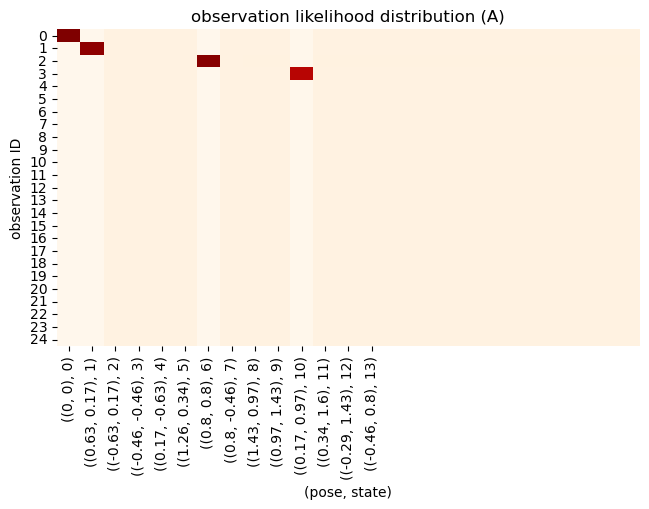

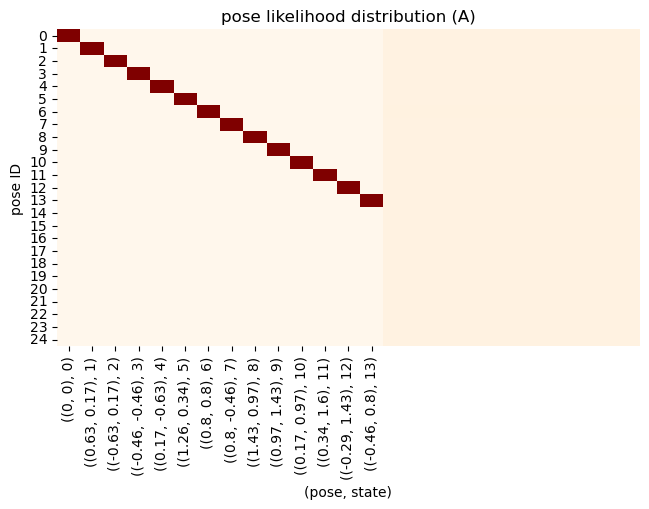

In [202]:
A0 = plot_likelihood(ours.A[0], ours.agent_state_mapping, tittle_add='observation')
A1 = plot_likelihood(ours.A[1], ours.agent_state_mapping, tittle_add='pose')

In [203]:
ours.B[0][5,1,:]

array([0.73879317, 0.07075188, 0.00189526, 0.00294722, 0.0041982 ,
       0.00915122, 0.00297279, 0.0203352 , 0.0105674 , 0.00685686,
       0.02033765, 0.31307732, 0.04      ])

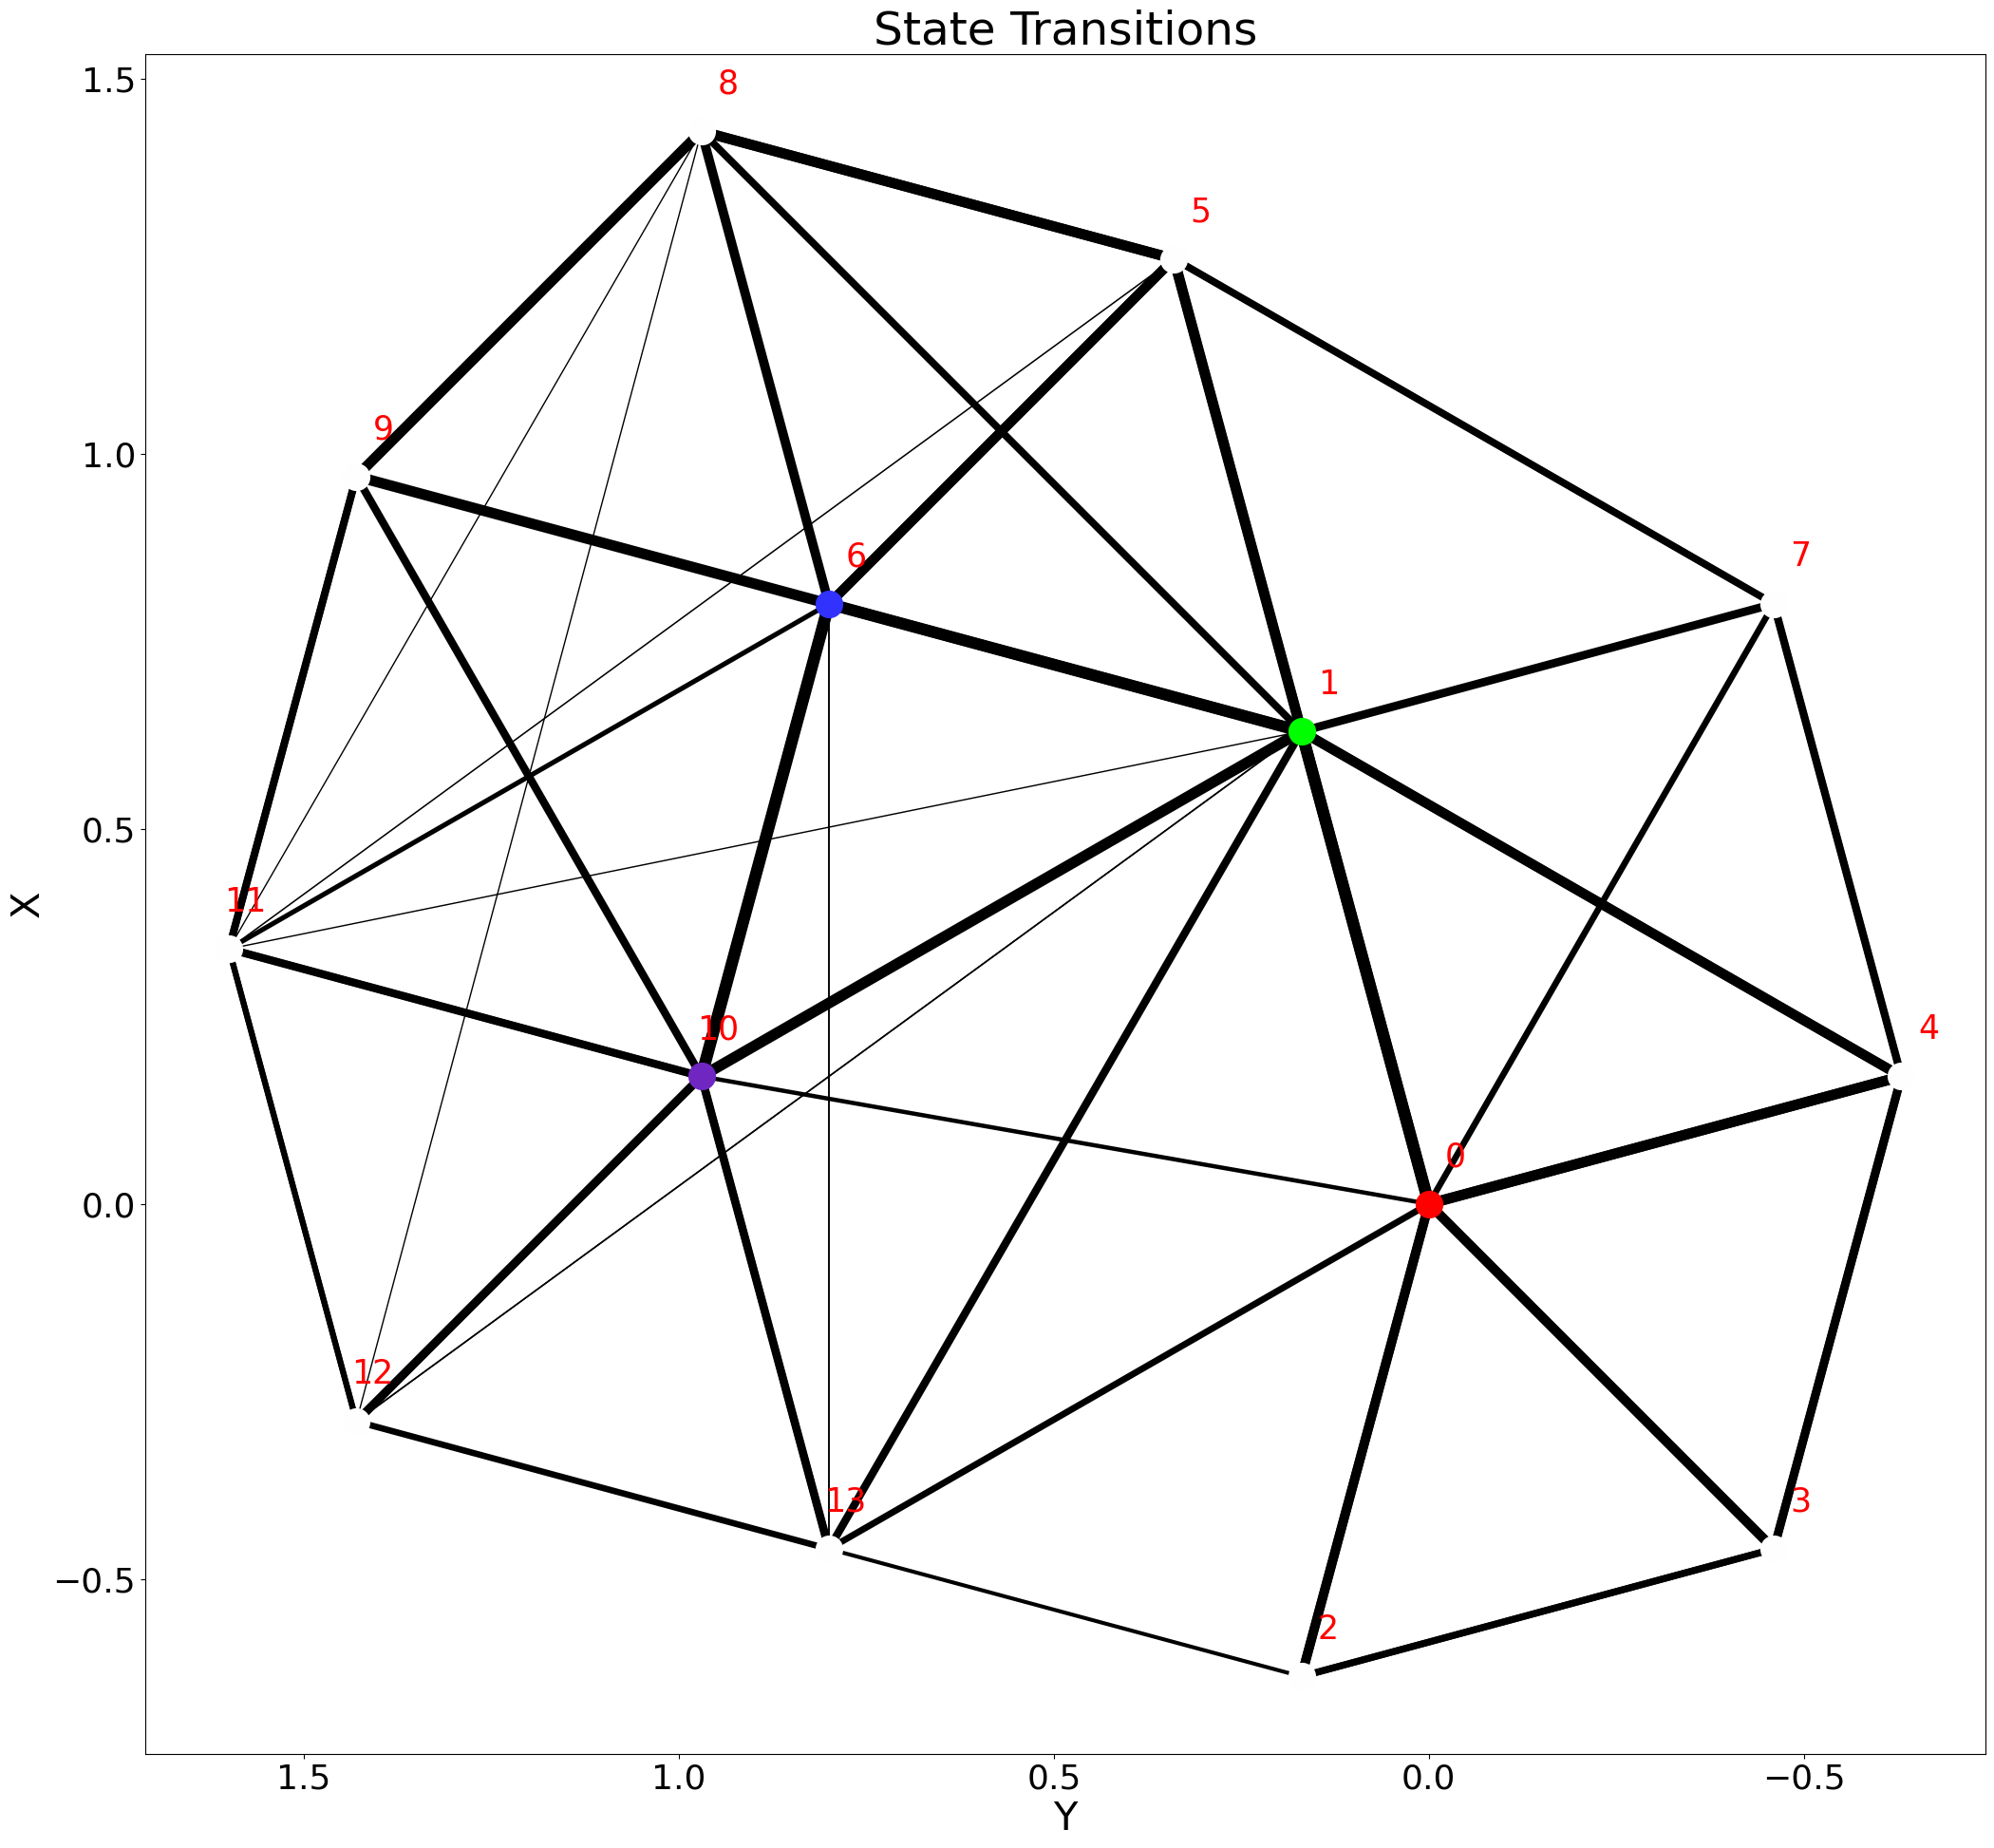

In [204]:
plot = plot_state_in_map(ours.B[0], ours.agent_state_mapping)

In [205]:
#step2
print(ours.B[0][3,5,:])
print(ours.B[0][5,3,:])

[0.03929717 0.03893368 0.00809289 0.01520043 0.01022288 0.03000032
 0.00338822 0.02572888 0.01263267 0.03983669 0.03992961 0.03893331
 0.04      ]
[0.03962102 0.01156424 0.02193367 0.0201292  0.03996023 0.03998414
 0.03904699 0.03998418 0.03999683 0.03998421 0.03999684 0.01613206
 0.04      ]


In [206]:
#step3
print(ours.B[0][3,5,:])
print(ours.B[0][5,3,:])

[0.03929717 0.03893368 0.00809289 0.01520043 0.01022288 0.03000032
 0.00338822 0.02572888 0.01263267 0.03983669 0.03992961 0.03893331
 0.04      ]
[0.03962102 0.01156424 0.02193367 0.0201292  0.03996023 0.03998414
 0.03904699 0.03998418 0.03999683 0.03998421 0.03999684 0.01613206
 0.04      ]


In [207]:
#step4
print(ours.B[0][8,12,:])
print(ours.B[0][12,8,:])

[0.02084073 0.10004765 0.04136021 0.03318319 0.03656154 0.03667025
 0.03068612 0.03584551 0.01336542 0.03534033 0.03047674 0.02193996
 0.0397812 ]
[0.03930606 0.03812059 0.03807268 0.03541854 0.01617596 0.03822554
 0.01109574 0.01453609 0.00910995 0.03878628 0.03982322 0.03874406
 0.03979264]


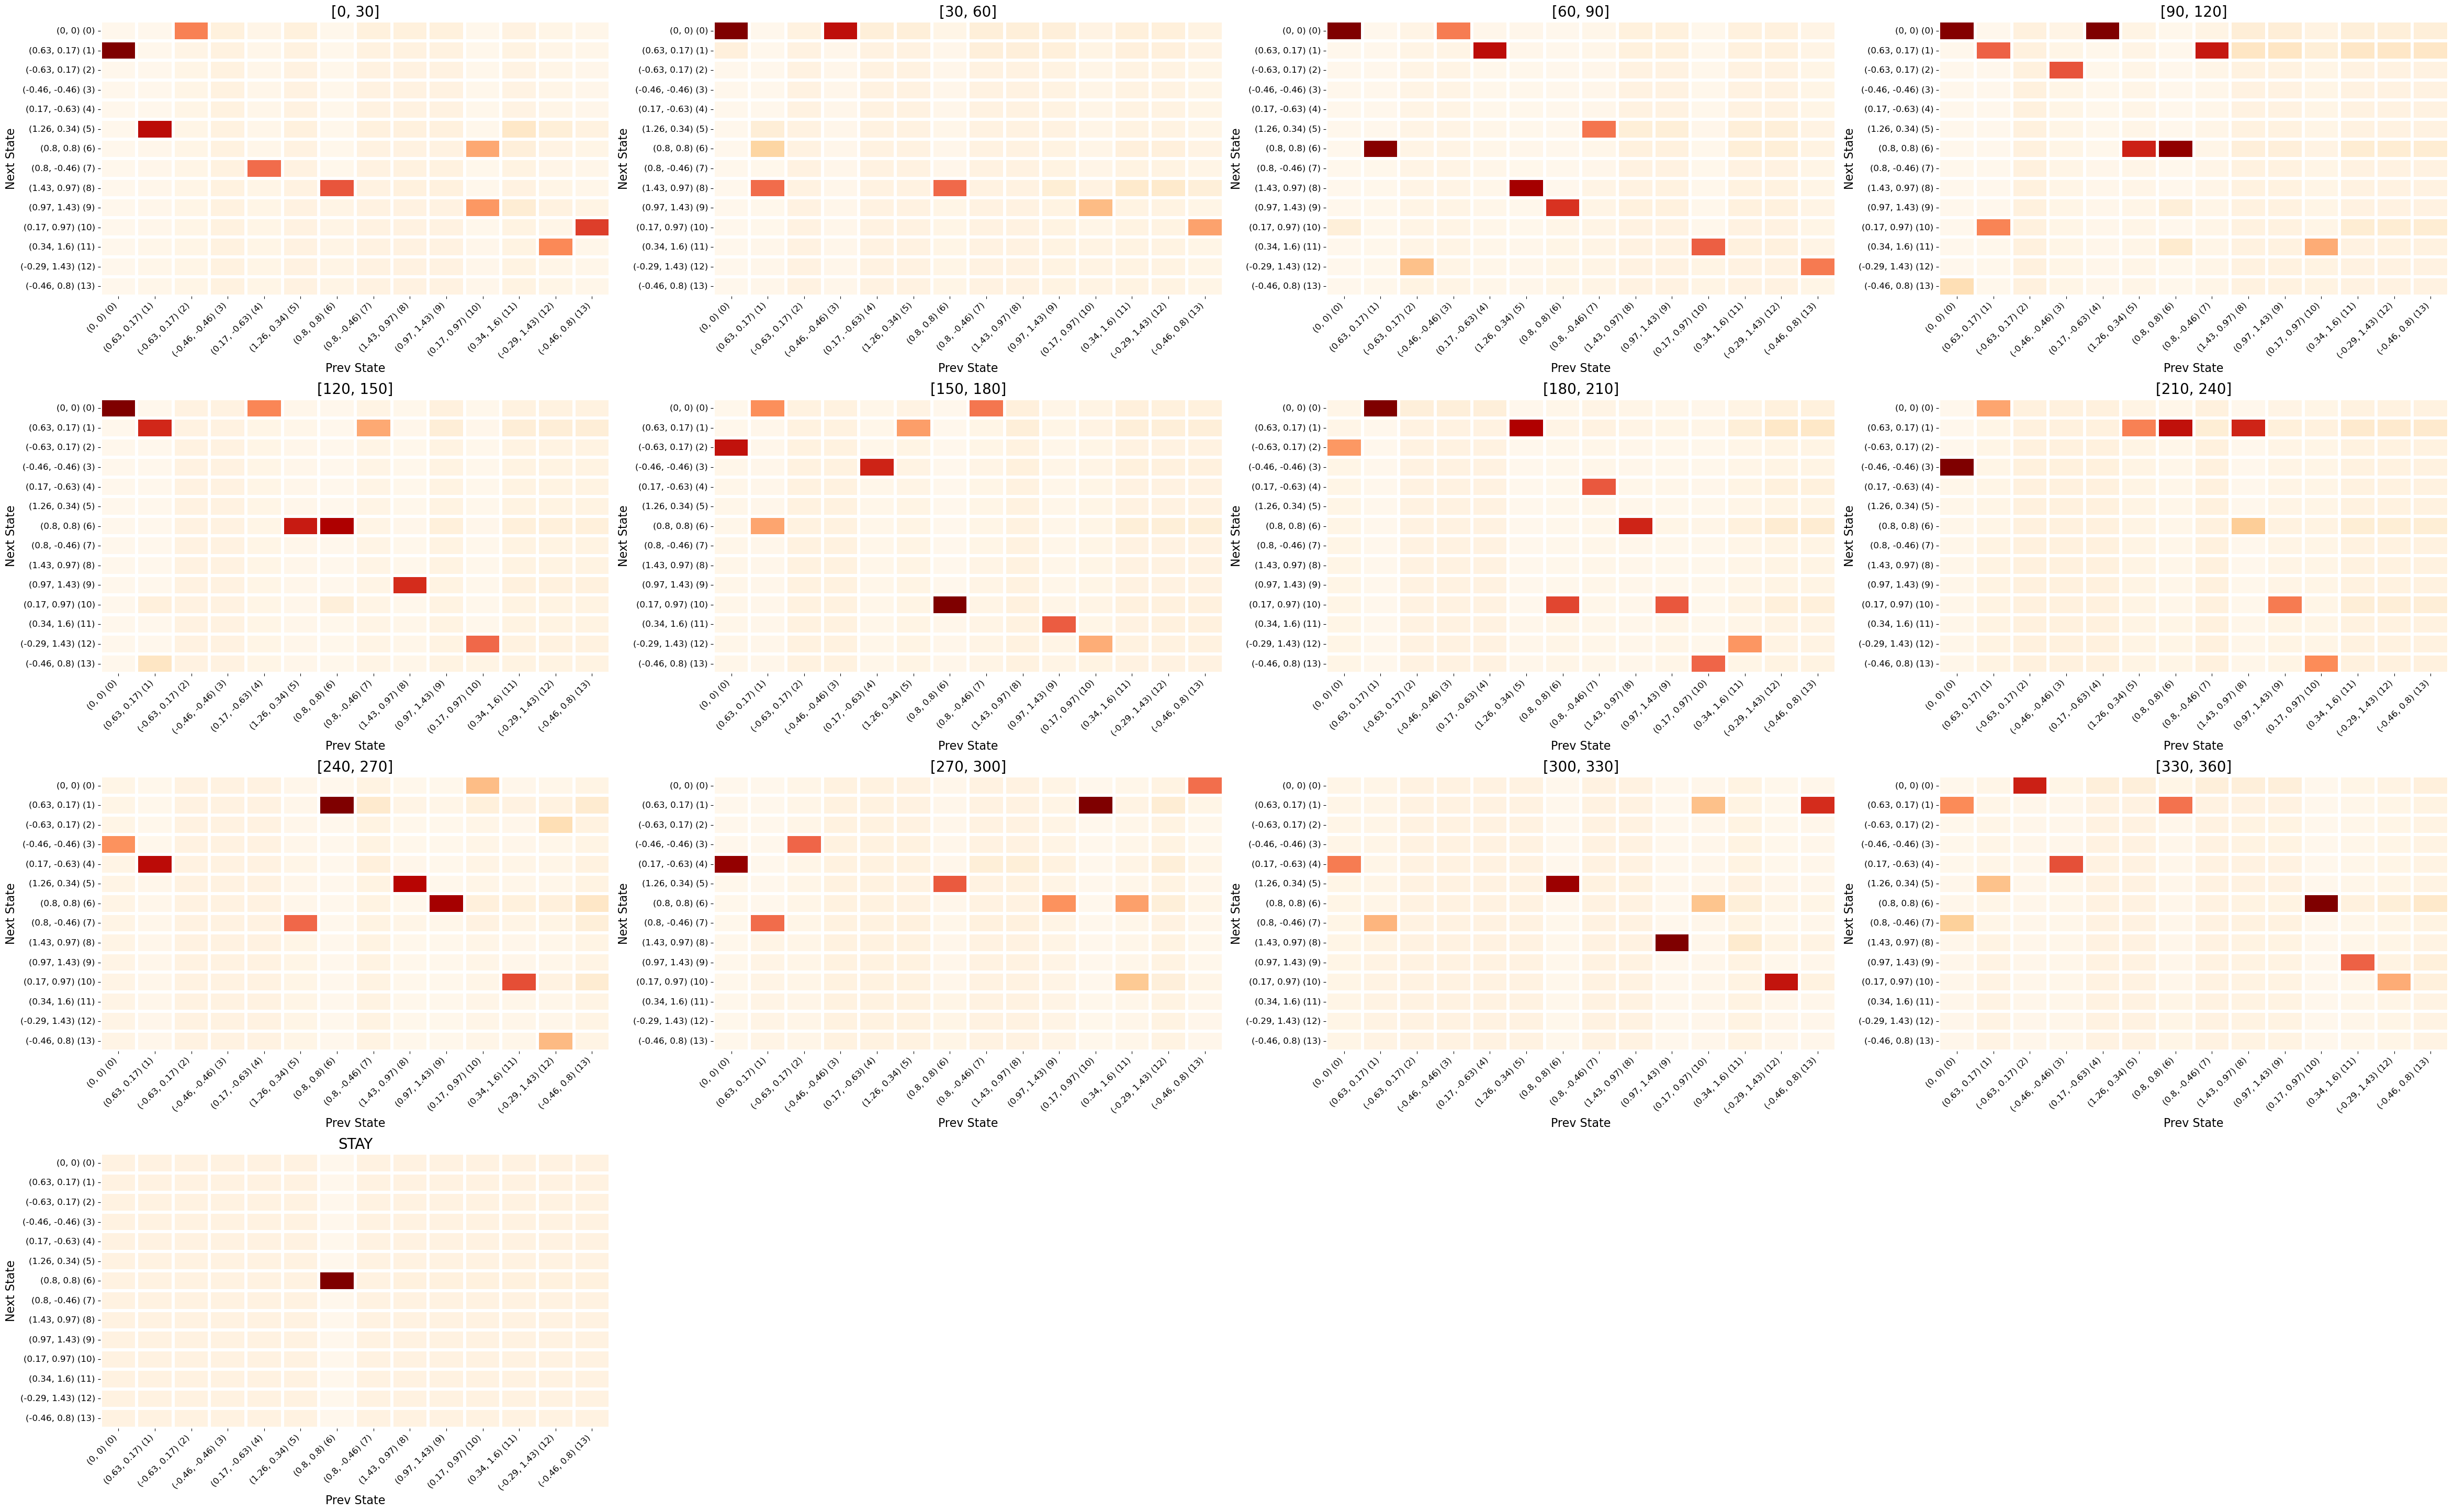

In [208]:
B_plot = plot_transitions(ours.B[0], ours.agent_state_mapping, ours.possible_actions)

## Random tests

In [209]:
poses = ours.PoseMemory.poses
print(poses)
pose = poses[3]
for ref_p_idx, p in enumerate(poses):
    angle_p_to_pose = np.arctan2(pose[0], p[0]) - np.arctan2(pose[1], p[1])
    print(ref_p_idx, np.rad2deg(angle_p_to_pose))

    angle_p_to_pose = clip_rad_360(angle_p_to_pose)

    print(ref_p_idx, np.rad2deg(angle_p_to_pose))



[(0, 0), (0.63, 0.17), (-0.63, 0.17), (-0.46, -0.46), (0.17, -0.63), (1.26, 0.34), (0.8, 0.8), (0.8, -0.46), (1.43, 0.97), (0.97, 1.43), (0.17, 0.97), (0.34, 1.6), (-0.29, 1.43), (-0.46, 0.8)]
0 0.0
0 0.0
1 33.582064299494185
1 33.582064299494185
2 -74.14718247732742
2 285.85281752267264
3 0.0
3 0.0
4 74.14718247732742
4 74.14718247732742
5 33.47467087337271
5 33.47467087337271
6 0.0
6 0.0
7 105.10109816138544
7 105.10109816138544
8 7.5397041245544765
8 7.5397041245544765
9 -7.5397041245544765
9 352.4602958754455
10 -44.34587915798744
10 315.65412084201256
11 -37.49082230389847
11 322.5091776961015
12 -104.39689980655707
12 255.60310019344294
13 -105.10109816138544
13 254.8989018386146


In [210]:
pose = (-0.63, 0.17)
p = [-0.63, -0.17]

euclidian_distance(pose, p)

0.34

Angles between poses

In [211]:
pose = [0.56,0.15]
for ref_p_idx, p in enumerate(poses):
    # print(np.arctan2(pose[0], p[0]),np.arctan2(pose[1], p[1]))
    #angle between two points
    print('_')
    aangle_pose_to_p =np.arctan2(p[1]- pose[1], p[0]- pose[0])
    # aaangle_p_to_pose =clip_rad_360(np.arctan2(p[1]- 0, p[0]- 0))
    # print('angle_to_origin', np.rad2deg(aaangle_p_to_pose))
    aangle_pose_to_p = clip_rad_360(aangle_pose_to_p)
    #In reference to origin
    angle_pose_to_p = np.arctan2(p[1], p[0]) - np.arctan2(pose[1], pose[0])
#    angle_p_to_pose = np.arctan2(p[0], p[1]) - np.arctan2(pose[0], pose[1])

    angle_pose_to_p = clip_rad_360(angle_pose_to_p)
    dist_p_to_pose = euclidian_distance(pose, p)
    print(ref_p_idx, p,' to ', pose, 'angle', np.rad2deg(angle_pose_to_p), np.rad2deg(aangle_pose_to_p))


_
0 (0, 0)  to  [0.56, 0.15] angle 345.004920870824 194.995079129176
_
1 (0.63, 0.17)  to  [0.56, 0.15] angle 0.10601903220945101 15.945395900922879
_
2 (-0.63, 0.17)  to  [0.56, 0.15] angle 149.90382270943857 179.0371363743638
_
3 (-0.46, -0.46)  to  [0.56, 0.15] angle 210.004920870824 210.8810786969436
_
4 (0.17, -0.63)  to  [0.56, 0.15] angle 270.1060190322095 243.434948822922
_
5 (1.26, 0.34)  to  [0.56, 0.15] angle 0.10601903220945101 15.185837262201327
_
6 (0.8, 0.8)  to  [0.56, 0.15] angle 30.004920870824012 69.7343025290525
_
7 (0.8, -0.46)  to  [0.56, 0.15] angle 315.1060190322095 291.4767909795404
_
8 (1.43, 0.97)  to  [0.56, 0.15] angle 19.15481624102664 43.30535293146284
_
9 (0.97, 1.43)  to  [0.56, 0.15] angle 40.855025500621394 72.2390880750625
_
10 (0.17, 0.97)  to  [0.56, 0.15] angle 65.064347837711 115.43621638041736
_
11 (0.34, 1.6)  to  [0.56, 0.15] angle 63.00802156290043 98.62735314406525
_
12 (-0.29, 1.43)  to  [0.56, 0.15] angle 86.46887388651658 123.586645653622

Point in polygons

In [212]:
# Checking if a point is inside a polygon
def point_in_polygon(pt, polygon):
    num_vertices = len(polygon)
    inside = False
 
    # Store the first point in the polygon and initialize the second point
    p1 = polygon[0]
 
    # Loop through each edge in the polygon
    for i in range(1, num_vertices + 1):
        # Get the next point in the polygon
        p2 = polygon[i % num_vertices]
 
        # Check if the point is above the minimum y coordinate of the edge
        if pt[1] > min(p1[1], p2[1]):
            # Check if the point is below the maximum y coordinate of the edge
            if pt[1] <= max(p1[1], p2[1]):
                # Check if the point is to the left of the maximum x coordinate of the edge
                if pt[0] <= max(p1[0], p2[0]):
                    # Calculate the x-intersection of the line connecting the point to the edge
                    x_intersection = (pt[1] - p1[1]) * (p2[0] - p1[0]) / (p2[1] - p1[1]) + p1[0]
 
                    # Check if the point is on the same line as the edge or to the left of the x-intersection
                    if p1[0] == p2[0] or pt[0] <= x_intersection:
                        # Flip the inside flag
                        inside = not inside
 
        # Store the current point as the first point for the next iteration
        p1 = p2
 
    # Return the value of the inside flag
    return inside

POint in triangle

In [213]:
import copy
def sign(p1, p2, p3):
    return (p1[0]- p3[0]) * (p2[1] - p3[1]) - (p2[0] - p3[0]) * (p1[1] - p3[1])

def point_in_triangle(pt, triangle_poses):
    p1,p2,p3 = triangle_poses[0], triangle_poses[1], triangle_poses[2]
    d1 = sign(pt, p1, p2)
    d2 = sign(pt, p2, p3)
    d3 = sign(pt, p3, p1)
    has_neg = (d1 < 0) or (d2 < 0) or (d3 < 0)
    has_pos = (d1 > 0) or (d2 > 0) or (d3 > 0) 
    return not (has_neg and has_pos)

odom = ours.PoseMemory.get_odom()
action_id = 0

zone_influence = ours.possible_actions[action_id][:]

triangle_poses = [odom]
print('odom', odom, 'IR', ours.influence_radius, 'ZI', zone_influence)
for angle_deg in zone_influence:
    angle_rad = np.deg2rad(angle_deg)
    x =2*ours.influence_radius * np.cos(angle_rad) + odom[0]
    y= 2*ours.influence_radius * np.sin(angle_rad) + odom[1]
    triangle_poses.append([x,y])
print('triangle_poses', triangle_poses)

point_in_triangle([0.5,0.25], triangle_poses)

# zone_influence = ours.possible_actions[action_id]
# max_dist_angle = (zone_influence[0] + zone_influence[1]) /2
# # not pretty but because Copy [:] etc is not really changing pointer...
# zone_influence = [zone_influence[0], max_dist_angle, zone_influence[1]]

# quadri_poses = [odom]
# print('odom', odom, 'IR', ours.influence_radius, 'ZI', zone_influence)
# for angle_deg in zone_influence:
#     angle_rad = np.deg2rad(angle_deg)
#     x =2*ours.influence_radius * np.cos(angle_rad) + odom[0]
#     y= 2*ours.influence_radius * np.sin(angle_rad) + odom[1]
#     quadri_poses.append([x,y])

# print(max_dist_angle,'quadri_poses', quadri_poses)

# point_in_polygon([0.5,0.25], quadri_poses)



odom [0.17, 0.97, 2.8780287700067553] IR 0.5 ZI [0, 30]
triangle_poses [[0.17, 0.97, 2.8780287700067553], [1.17, 0.97], [1.0360254037844385, 1.4699999999999998]]


False

In [214]:
possible_actions = ours.possible_actions.copy()
possible_actions

{0: [0, 30],
 1: [30, 60],
 2: [60, 90],
 3: [90, 120],
 4: [120, 150],
 5: [150, 180],
 6: [180, 210],
 7: [210, 240],
 8: [240, 270],
 9: [270, 300],
 10: [300, 330],
 11: [330, 360],
 12: 'STAY'}

In [215]:
def pose_to_id(self, pose:list=None, odom:list=None, save_in_memory:bool = False) -> int:
        """
        return the position id from memory. 
        Evaluate if the given pose is in action range of other memorised poses 
        considering it's orientation difference and distance (<zone of influence)

        Parameters:
            pose (list): the pose we want to evaluate from memory
            save_in_memory (bool, optional): Do we want to save this pose in memory? 

        Returns:
            int: The pose id, -1 if none in memory and we don't want to remember this new pose
        """
        
        if pose is None:
            pose = self.odometry[:2]
        else:
            pose = pose[:2]

        if odom is None:
            odom = self.odometry[:2]
        else:
             odom = odom[:2]
        
        zone_action = self.possible_actions[0]
        p_idx = -1
        #TODO: CONSIDR ANGLE, ELSE WE Can'T HAVE 12 NODES IN SAME ZONE OF INF
        ref_closest_dist = self.influence_radius
        for ref_p_idx, p in enumerate(self.poses):
            print('_____')
            angle_pose_to_curr_pose = clip_rad_360(np.arctan2(pose[1]- odom[1], pose[0]- odom[0]))
            angle_p_to_curr_pose= clip_rad_360(np.arctan2(p[1]- odom[1], p[0]- odom[0])) 
            diff_angle =  abs(angle_pose_to_curr_pose -angle_p_to_curr_pose)
            # angle_ref_pose_to_origin = clip_rad_360(angle_ref_pose_to_origin)
            
            dist_p_to_pose = euclidian_distance(pose, p)
            print('ref idx and pose', ref_p_idx,p)
            print('angle pose to curr_pose', round(np.rad2deg(angle_pose_to_curr_pose),2), 'angle_p_to_curr_pose',round(np.rad2deg(angle_p_to_curr_pose),2),'dist', dist_p_to_pose)
            #If pose in the same action and influence zone
            #if abs(np.rad2deg(angle_p_to_pose)) <= np.mean(zone_action) and dist_p_to_pose < ref_closest_dist:
            if np.rad2deg(diff_angle) <= np.mean(zone_action) and dist_p_to_pose < ref_closest_dist:
                p_idx = ref_p_idx
                ref_closest_dist = dist_p_to_pose
                
        #No identified pose match current pose
        if p_idx < 0 and save_in_memory:
            pose = tuple(pose)
            self.poses.append(pose)
            p_idx = self.poses.index(pose)
        
        return p_idx

In [216]:
def pose_transition_from_action(self,action:int, odom:list=None, ideal_dist:float=None):
        """
        Check if we have a pose in twice the area of the agen influence radius. 
        If we do, return this pose
        If we don't, we create a new node at a given ideal distance (if none given it's the influence radius + small value)
        """
        if odom is None:
            odom = self.odometry.copy()
        if self.possible_actions[action] == 'STAY':
            return odom
        
        zone_influence = self.possible_actions[action][:]
        triangle_poses = [odom]
        # print('odom', odom, 'IR', self.influence_radius, 'ZI', zone_influence)
        for angle_deg in zone_influence:
            angle_rad = np.deg2rad(angle_deg)
            x= 2*self.influence_radius * np.cos(angle_rad) + odom[0]
            y= 2*self.influence_radius * np.sin(angle_rad) + odom[1]
            triangle_poses.append([x,y])
        print('triangle_poses', triangle_poses)
        #check if pose in zone of action already exist in memory
        for pose in self.poses:
            pt_in_tr = point_in_triangle(pose[:2], triangle_poses)
            if pt_in_tr and not list(pose[:2]) == list(odom[:2]):
                return pose[:] #return corresponding pose
        if ideal_dist is None:
            ideal_dist = self.influence_radius + self.influence_radius/5 #just not be exactly on the radius
        average_angle = np.deg2rad(np.mean(zone_influence))
        x= ideal_dist * np.cos(average_angle) + odom[0]
        y= ideal_dist * np.sin(average_angle) + odom[1]
        return [x,y]

In [217]:
triangles_poses = [[0.17, 0.97], [-0.3300000000000003, 0.10397459621556171], [0.16999999999999982, -0.030000000000000027]]
next_pose = [0.0, 0.0]
point_in_triangle(next_pose, triangle_poses)

False

In [218]:
# next_pose = [0.97, 0.26]
# next_pose = [1.12, 0.0]
odom = [0.17, 0.97]
print(pose_transition_from_action(ours.PoseMemory, 8, odom=odom))
# print(pose_transition_from_action(ours.PoseMemory, 1, odom=odom))

# pose_to_id(ours.PoseMemory, next_pose, odom)

triangle_poses [[0.17, 0.97], [-0.3300000000000003, 0.10397459621556171], [0.16999999999999982, -0.030000000000000027]]
[0.014708572938487596, 0.39044450422655896]


Point in triangle with arc

In [219]:
def sign(p1, p2, p3):
    return (p1[0]- p3[0]) * (p2[1] - p3[1]) - (p2[0] - p3[0]) * (p1[1] - p3[1])

def is_clokwise_from_p1_to_p2(p1:list, p2:list)->bool:
    ''' 
    Determines whether `p2` is in the **clockwise direction** from `p1`.

    This is done by projecting `p2` onto the **perpendicular normal** of `p1`. 
    If the projection is **negative**, `p2` is clockwise from `p1`, otherwise counterclockwise.

    Parameters:
        p1 (list or tuple): The first 2D point `[x1, y1]`
        p2 (list or tuple): The second 2D point `[x2, y2]`

    Returns:
        bool: `True` if `p2` is **clockwise** from `p1`, otherwise `False`
    '''
    #p1_n= [-p1[1],p1[0]] #counter clockwise normal
    pt_proj = -p1[0]*p2[1] + p1[1]*p2[0]
    return pt_proj < 0

def is_within_radius_range(pt:list, arc_radius:float)->bool:
    '''
    Checks if a point `pt` lies within a circular region **centered at the origin** 
    with the given `arc_radius`.

    Parameters:
        pt (list or tuple): The 2D point `[x, y]`
        arc_radius (float): The radius of the circular region

    Returns:
        bool: `True` if `pt` is **inside or on** the circle, otherwise `False`
    '''
    return pt[0]**2 + pt[1]**2 <= arc_radius**2

def point_in_triangle_with_arc(pt:list, polygon:list)-> bool:
    '''
    Determines if a point `pt` lies **inside a triangular region with one curved edge**.

    The **polygon** is expected to have **4 points**:
    - `[odom, start_vector, end_vector, arc_center]`
    - The **arc** is formed between `start_vector` and `end_vector`, centered at `arc_center`.

    **Steps:**
    1. Check if the point is inside the regular **triangle** formed by `odom, start_vector, end_vector`.
    2. If not, check if it's inside the **curved region**:
        - The point must be within the **circular range**.
        - The point must be **between** `start_vector` and `end_vector` in a clockwise sense.

    Parameters:
        pt (list or tuple): The 2D point `[x, y]` to check.
        polygon (list of lists): A list of **4 points** `[p0, p1, p2, arc_center]`.

    Returns:
        bool: `True` if `pt` is inside the **triangle-with-arc**, otherwise `False`.
    
    NOTE: the odom point will not be considered in triangle with arc
    '''
    arc_center = polygon.pop(2)
    arc_radius = euclidian_distance(polygon[0], arc_center) #should be influence_radius*2
    p1, p2 = polygon[1], polygon[2]

    # Check if inside the triangle
    if point_in_triangle(pt, polygon):
        print('In triangle')
        return True 

    
    # If p2 vector is clocwise from pt and pt is clocwise from p1
    #  and in the circular region, then it's in the zone
    if is_within_radius_range(pt, arc_radius) and \
    is_clokwise_from_p1_to_p2(pt,p2) and not is_clokwise_from_p1_to_p2(pt,p1):
       return True

    return False 



In [220]:
def quadrilater_points(self, action, odom):
    zone_influence = self.possible_actions[action][:]
    quadri_poses = [odom]
 
    max_dist_angle = (zone_influence[0] + zone_influence[1]) /2
    # not pretty but because Copy [:] etc is not really changing pointer...
    zone_influence = [zone_influence[0], max_dist_angle, zone_influence[1]]
    
    for angle_deg in zone_influence:
        angle_rad = np.deg2rad(angle_deg)
        x =2*self.influence_radius * np.cos(angle_rad) + odom[0]
        y= 2*self.influence_radius * np.sin(angle_rad) + odom[1]
        quadri_poses.append([x,y])

    return quadri_poses
        
def pose_transition_from_action(self,action:int, odom:list=None, ideal_dist:float=None):
    """
    Check if we have a pose in twice the area of the agen influence radius. 
    If we do, return this pose
    If we don't, we create a new node at a given ideal distance (if none given it's the influence radius + small value)
    """
    if odom is None:
        odom = self.odometry.copy()
    if self.possible_actions[action] == 'STAY':
        return odom
    
    
    polygon = quadrilater_points(self,odom)
    print('odom', odom, 'IR', self.influence_radius, 'ZI', zone_influence)
    
    #check if pose in zone of action already exist in memory
    for pose in self.poses:
        pt_in_tr = point_in_triangle(pose[:2], polygon)
        print('pt in polygon?', pt_in_tr)
        if pt_in_tr and not list(pose[:2]) == list(odom[:2]):
            return pose[:] #return corresponding pose
    if ideal_dist is None:
        ideal_dist = self.influence_radius + self.influence_radius/5 #just not be exactly on the radius
    average_angle = np.deg2rad(np.mean(polygon))
    x= ideal_dist * np.cos(average_angle) + odom[0]
    y= ideal_dist * np.sin(average_angle) + odom[1]
    return [x,y]


In [221]:
odom = [0.0, 0.0]
pt = [0.10,0.10]
quadri = quadrilater_points(ours.PoseMemory,  0, odom=odom)
point_in_triangle_with_arc(pt, quadri)
# pop_elem = quadri.pop(2)

# euclidian_distance(pop_elem, odom)
# print(quadri, pop_elem)

False

check point assignement

In [222]:
def point_in_triangle_with_arc(pt:list, quadri_poses:list)-> bool:
    '''
    Determines if a point `pt` lies **inside a triangular region with one curved edge**.

    The **polygon** is expected to have **4 points**:
    - `[odom, start_vector, end_vector, arc_center]`
    - The **arc** is formed between `start_vector` and `end_vector`, centered at `arc_center`.

    **Steps:**
    1. Check if the point is inside the regular **triangle** formed by `odom, start_vector, end_vector`.
    2. If not, check if it's inside the **curved region**:
        - The point must be within the **circular range**.
        - The point must be **between** `start_vector` and `end_vector` in a clockwise sense.

    Parameters:
        pt (list or tuple): The 2D point `[x, y]` to check.
        polygon (list of lists): A list of **4 points** `[p0, p1, p2, arc_center]`.

    Returns:
        bool: `True` if `pt` is inside the **triangle-with-arc**, otherwise `False`.
    
    '''
    polygon = quadri_poses[:]
    arc_point = polygon.pop(2)
    arc_radius = euclidian_distance(polygon[0], arc_point) #should be influence_radius*2
    p1, p2 = polygon[1], polygon[2]

    # Check if inside the triangle
    if point_in_triangle(pt, polygon):
        print(pt,'In triangle')
        return True 

    print('<rad', is_within_radius_range(pt, polygon[0], arc_radius), ' pt to p2 clockwise',
    is_clokwise_from_p1_to_p2(pt,p2),  ' pt to p1 NOT clockwise', not is_clokwise_from_p1_to_p2(pt,p1))
    # If p2 vector is clocwise from pt and pt is clocwise from p1
    #  and in the circular region, then it's in the zone
    if is_within_radius_range(pt, polygon[0], arc_radius) and \
    is_clokwise_from_p1_to_p2(pt,p2) and not is_clokwise_from_p1_to_p2(pt,p1):
       print(pt,'In arc')
       return True

    return False 

In [223]:
def pose_transition_from_action(self,action:int, odom:list=None, ideal_dist:float=None):
        """
        Check if we have a pose in twice the area of the agen influence radius. 
        If we do, return this pose
        If we don't, we create a new node at a given ideal distance (if none given it's the influence radius + small value)
        """
        if odom is None:
            odom = self.odometry.copy()
        if self.possible_actions[action] == 'STAY':
            return odom
        
        zone_influence = self.possible_actions[action][:]
        quadri = quadrilater_points(odom=odom, zone_influence=zone_influence,\
                                     influence_radius= self.influence_radius)
        print('quadri',quadri)
        x = []
        y = []
        for i in quadri:
             x.append(i[0])
             y.append(i[1])


        print(x, y)
        #check if pose in zone of action already exist in memory
        for pose in self.poses:
            print('pose',pose)
            pt_in_tr = point_in_triangle_with_arc(pose[:2], quadri)
            if pt_in_tr and not list(pose[:2]) == list(odom[:2]):
                return pose[:] #return corresponding pose
        print('no good point')
        if ideal_dist is None:
            ideal_dist = self.influence_radius + self.influence_radius/5 #just not be exactly on the radius
        average_angle = np.deg2rad(np.mean(zone_influence))
        x= ideal_dist * np.cos(average_angle) + odom[0]
        y= ideal_dist * np.sin(average_angle) + odom[1]
        return [x,y]

In [224]:
def determine_next_pose(self, pose, action_id, min_dist_to_next_node):
        next_pose = pose_transition_from_action(self.PoseMemory, action =action_id, odom= pose, ideal_dist=min_dist_to_next_node)
        next_pose = [round(elem, 2) for elem in next_pose]
        next_pose_id = self.PoseMemory.pose_to_id(next_pose, save_in_memory=False)
        print('action, next pose and id', action_id, next_pose, next_pose_id)
        return next_pose, next_pose_id
action_adjacent = 7
next_adjacent_pose, next_adjacent_pose_id = determine_next_pose(ours, [0.8,0.8], \
                                                                action_adjacent, 0.65)

TypeError: quadrilater_points() got an unexpected keyword argument 'zone_influence'

In [ ]:
[0.8, -0.06602540378443844, 0.09289321881345236, 0.2999999999999997] [0.8, 0.29999999999999993, 0.09289321881345258, -0.06602540378443822]